In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

from IPython.display import display #To display dataframe with a nice format.

# Setting display precision for pandas
pd.set_option("display.precision", 2)
# Set display option to show all columns
pd.set_option('display.max_columns', None)

blue_green      = (82/255, 162/255, 160/255)
blue_green_dark = (41/255, 81/255, 81/255)

# ==================================================================================================
# Set the fontsize & Bold for each GRAPH !!!
# ==================================================================================================
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["lines.markersize"] = 10
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams['axes.titlepad'] = 20 

In [2]:
# ==================================================================================================
# READ DATA
# ==================================================================================================
import csv
# Define the file path for the Excel data
url_data = r"C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET4_Anticipez_les_besoins_en_consommation_de_batiments\DATA\2016_Building_Energy_Benchmarking.csv"

df_data = pd.read_csv(url_data)
df_data

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3371                Horticulture building  1600 S Dakota St  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0     98101.0                    0659000030                    7   
1     98101.0                    0659000220                    7   
2     98101.0                    0659000475                    7   
3     98101.0                    0659000640                    7   
4     98121.0                    0659000970                    7   
...       ...                           ...                  ...   
3371      NaN                    1624049080                    2   
3372      NaN                    3558300000                    2   
3373      NaN                    1794501150                    7   
3374      NaN                    7883603155                    1   
3375      NaN                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN     47.61    -122.34       1927   
1                  DOWNTOWN     47.61    -122.33       1996   
2                  DOWNTOWN     47.61    -122.34       1969   
3                  DOWNTOWN     47.61    -122.34       1926   
4                  DOWNTOWN     47.61    -122.34       1980   
...                     ...       ...        ...        ...   
3371       GREATER DUWAMISH     47.57    -122.31       1990   
3372               DOWNTOWN     47.60    -122.32       2004   
3373  MAGNOLIA / QUEEN ANNE     47.64    -122.36       1974   
3374       GREATER DUWAMISH     47.53    -122.32       1989   
3375       GREATER DUWAMISH     47.54    -122.30       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
2                   1.0              41            956110              196718   
3                   1.0              10             61320                   0   
4                   1.0              18            175580               62000   
...                 ...             ...               ...                 ...   
3371                1.0               1            

# I. CLEANING and FIRST EXPLORATION

## I.1. Check for Dtypes errors

In [3]:
# ==================================================================================================
# CHECK Dtype and modify if needed
# ==================================================================================================
df_data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [4]:
# Modify the Dtypes
df_data['YearsENERGYSTARCertified'] = df_data['YearsENERGYSTARCertified'].astype('object')
df_data['Comments'] = df_data['Comments'].astype('object')


## I.2. Get the basic stats about my features

In [5]:
# ==================================================================================================
# NUMBER OF NUMERICAL AND CATEGORICAL FEATURES
# ==================================================================================================
numeric_features = df_data.select_dtypes(include=['number']).columns.tolist()
categoric_features = df_data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Number of numerical features:", len(numeric_features))
print("Number of categorical features:", len(categoric_features))
print("TOTAL number of features:", len(categoric_features) + len(numeric_features))
print("  ")
num_rows = df_data.shape[0]
print("Number of rows:", num_rows)

Number of numerical features: 29
Number of categorical features: 17
TOTAL number of features: 46
  
Number of rows: 3376


In [6]:
# ==================================================================================================
# STATISTIQUES DESCRIPTIVES (NUMERICAL FEATURES)
# ==================================================================================================
def is_normal(skewness, kurtosis):
    return abs(skewness) < 1 and kurtosis > 2 and kurtosis < 4
    
# Calculate descriptive statistics for numerical features
numeric_stats = df_data[numeric_features].describe()
numeric_stats = numeric_stats.T

# Calculate mode, skewness, and kurtosis for numerical features
numeric_mode = df_data[numeric_features].mode().iloc[0]
numeric_skewness = df_data[numeric_features].skew()
numeric_kurtosis = df_data[numeric_features].kurtosis()

# Check if the distribution is normal
is_normal_feature = (numeric_skewness.abs() < 1) & \
                     (numeric_kurtosis > 2) & \
                     (numeric_kurtosis < 4)

# Concatenate descriptive statistics, mode, skewness, and kurtosis into a single DataFrame
combined_numeric_stats = pd.concat([numeric_stats, numeric_mode, numeric_skewness, numeric_kurtosis, is_normal_feature], axis=1)

# Rename the columns for clarity
combined_numeric_stats.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mode', 'skewness', 'kurtosis', 'normal?']

# Print the combined dataframe for numerical features
print("Combined Descriptive Statistics, Mode, Skewness, and Kurtosis for Numerical Features:")
display(combined_numeric_stats)



# ==================================================================================================
# STATISTIQUES DESCRIPTIVES (CATEGORICAL FEATURES)
# ==================================================================================================
# # For categorical features, you can only calculate mode
categorical_mode = df_data[categoric_features].mode().iloc[0]

# # Print the mode for categorical features
print("\nMode for Categorical Features:")
display(categorical_mode)




Combined Descriptive Statistics, Mode, Skewness, and Kurtosis for Numerical Features:


count      mean       std        min  \
OSEBuildingID                    3376.0  2.12e+04  1.22e+04       1.00   
DataYear                         3376.0  2.02e+03  0.00e+00    2016.00   
ZipCode                          3360.0  9.81e+04  1.86e+01   98006.00   
CouncilDistrictCode              3376.0  4.44e+00  2.12e+00       1.00   
Latitude                         3376.0  4.76e+01  4.78e-02      47.50   
Longitude                        3376.0 -1.22e+02  2.72e-02    -122.41   
YearBuilt                        3376.0  1.97e+03  3.31e+01    1900.00   
NumberofBuildings                3368.0  1.11e+00  2.11e+00       0.00   
NumberofFloors                   3376.0  4.71e+00  5.49e+00       0.00   
PropertyGFATotal                 3376.0  9.48e+04  2.19e+05   11285.00   
PropertyGFAParking               3376.0  8.00e+03  3.23e+04       0.00   
PropertyGFABuilding(s)           3376.0  8.68e+04  2.08e+05    3636.00   
LargestPropertyUseTypeGFA        3356.0  7.92e+04  2.02e+05    5656.00   
SecondLargestPropertyUseTypeGFA  1679.0  2.84e+04  5.44e+04       0.00   
ThirdLargestPropertyUseTypeGFA    596.0  1.17e+04  2.93e+04       0.00   
ENERGYSTARScore                  2533.0  6.79e+01  2.69e+01       1.00   
SiteEUI(kBtu/sf)                 3369.0  5.47e+01  5.63e+01       0.00   
SiteEUIWN(kBtu/sf)               3370.0  5.70e+01  5.72e+01       0.00   
SourceEUI(kBtu/sf)               3367.0  1.34e+02  1.39e+02       0.00   
SourceEUIWN(kBtu/sf)             3367.0  1.38e+02  1.39e+02      -2.10   
SiteEnergyUse(kBtu)              3371.0  5.40e+06  2.16e+07       0.00   
SiteEnergyUseWN(kBtu)            3370.0  5.28e+06  1.59e+07       0.00   
SteamUse(kBtu)                   3367.0  2.75e+05  3.91e+06       0.00   
Electricity(kWh)                 3367.0  1.09e+06  4.35e+06  -33826.80   
Electricity(kBtu)                3367.0  3.71e+06  1.49e+07 -115417.00   
NaturalGas(therms)               3367.0  1.37e+04  6.71e+04       0.00   
NaturalGas(kBtu)                 3367.0  1.37e+06  6.71e+06       0.00   
TotalGHGEmissions                3367.0  1.20e+02  5.39e+02      -0.80   
GHGEmissionsIntensity            3367.0  1.18e+00  1.82e+00      -0.02   

                                       25%       50%       75%       max  \
OSEBuildingID                     19990.75  2.31e+04  2.60e+04  5.02e+04   
DataYear                           2016.00  2.02e+03  2.02e+03  2.02e+03   
ZipCode                           98105.00  9.81e+04  9.81e+04  9.83e+04   
CouncilDistrictCode                   3.00  4.00e+00  7.00e+00  7.00e+00   
Latitude                             47.60  4.76e+01  4.77e+01  4.77e+01   
Longitude                          -122.35 -1.22e+02 -1.22e+02 -1.22e+02   
YearBuilt                          1948.00  1.98e+03  2.00e+03  2.02e+03   
NumberofBuildings                     1.00  1.00e+00  1.00e+00  1.11e+02   
NumberofFloors                        2.00  4.00e+00  5.00e+00  9.90e+01   
PropertyGFATotal                  28487.00  4.42e+04  9.10e+04  9.32e+06   
PropertyGFAParking                    0.00  0.00e+00  0.00e+00  5.13e+05   
PropertyGFABuilding(s)            27756.00  4.32e+04  8.43e+04  9.32e+06   
LargestPropertyUseTypeGFA         25094.75  3.99e+04  7.62e+04  9.32e+06   
SecondLargestPropertyUseTypeGFA    5000.00  1.07e+04  2.66e+04  6.87e+05   
ThirdLargestPropertyUseTypeGFA     2239.00  5.04e+03  1.01e+04  4.60e+05   
ENERGYSTARScore                      53.00  7.50e+01  9.00e+01  1.00e+02   
SiteEUI(kBtu/sf)                     27.90  3.86e+01  6.04e+01  8.34e+02   
SiteEUIWN(kBtu/sf)                   29.40  4.09e+01  6.43e+01  8.34e+02   
SourceEUI(kBtu/sf)                   74.70  9.62e+01  1.44e+02  2.62e+03   
SourceEUIWN(kBtu/sf)                 78.40  1.01e+02  1.48e+02  2.62e+03   
SiteEnergyUse(kBtu)              925128.59  1.80e+06  4.22e+06  8.74e+08   
SiteEnergyUseWN(kBtu)            970182.23  1.90e+06  4.38e+06  4.72e+08   
SteamUse(kBtu)                        0.00  0.00e+00  0.00e+00  1


Mode for Categorical Features:


BuildingType                           NonResidential
PrimaryPropertyType              Low-Rise Multifamily
PropertyName                          Northgate Plaza
Address                            2203 Airport Way S
City                                          Seattle
State                                              WA
TaxParcelIdentificationNumber              1625049001
Neighborhood                                 DOWNTOWN
ListOfAllPropertyUseTypes         Multifamily Housing
LargestPropertyUseType            Multifamily Housing
SecondLargestPropertyUseType                  Parking
ThirdLargestPropertyUseType              Retail Store
YearsENERGYSTARCertified                         2016
DefaultData                                     False
Comments                                          NaN
ComplianceStatus                            Compliant
Outlier                                   Low outlier
Name: 0, dtype: object

In [7]:
# Remove the empty feature 'Comments'
df_data = df_data.drop(columns = "Comments")
# Remove the dropped columns from the categorical features list
categoric_features.remove("Comments")

## I.3. Box plots

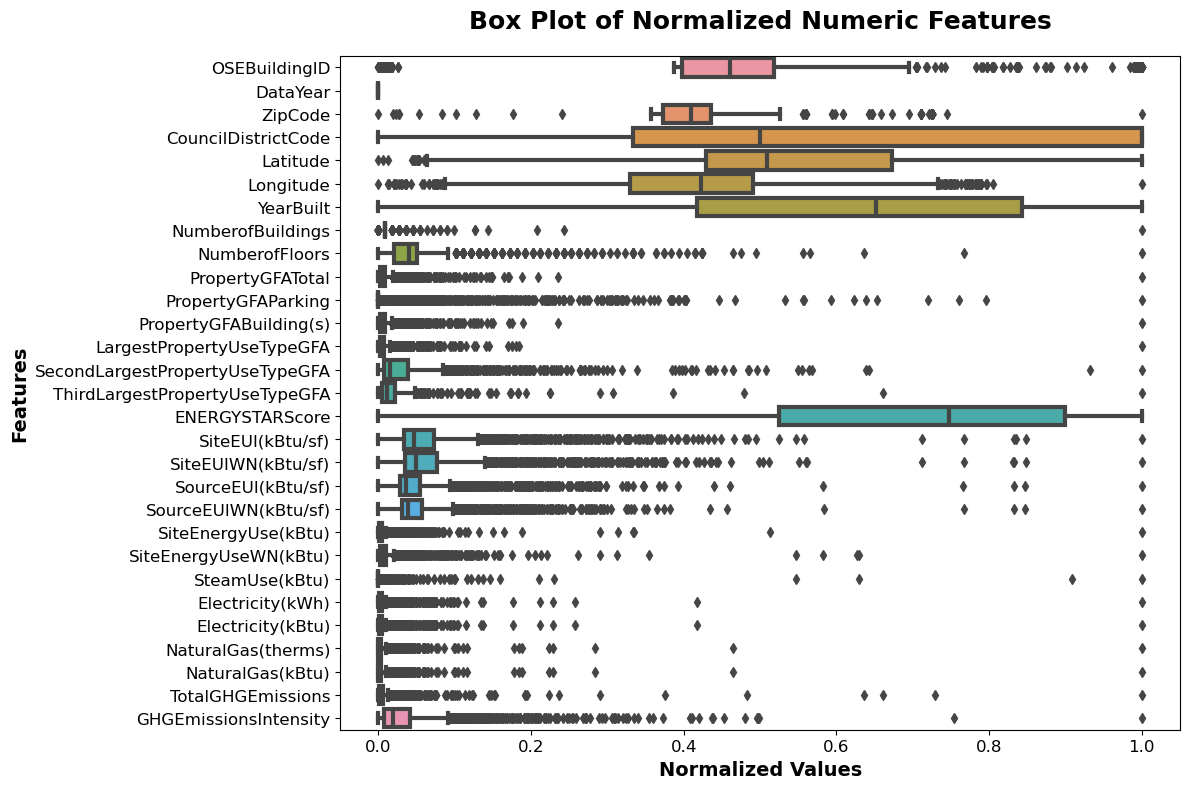

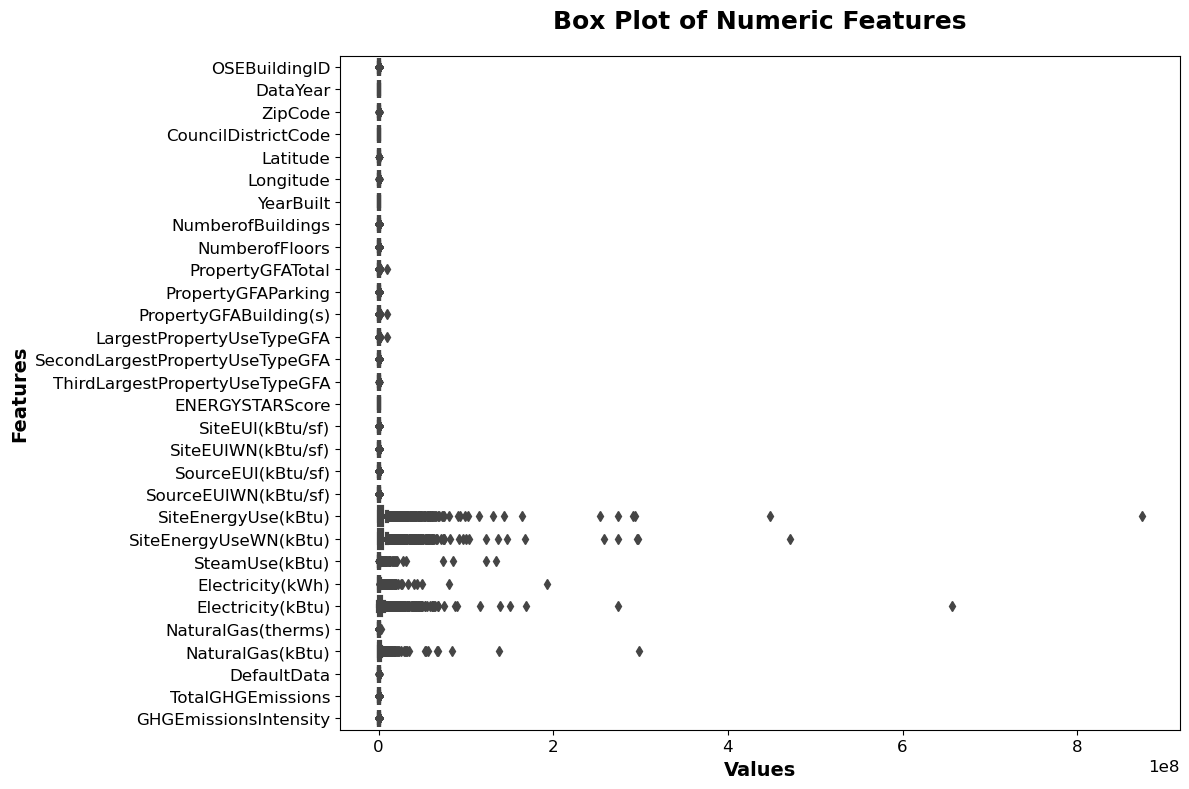

In [8]:
# ==================================================================================================
# BOXPLOTS
# ==================================================================================================
from sklearn.preprocessing import MinMaxScaler

def plot_boxplot(features, df, b_normalize):
    """
    Function to plot box plots for numeric features after normalization.

    Parameters:
    - features: list of numeric feature names to plot box plots for
    - df: DataFrame containing the data
    """
    if b_normalize == True:
        # Normalize the data
        scaler = MinMaxScaler()
        df_normalized = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)
    else:
        df_normalized = df
    plt.figure(figsize=(12, 8))
    
    # Create box plot for each feature
    sns.boxplot(data=df_normalized, orient="h")

    if b_normalize == True:
        plt.title("Box Plot of Normalized Numeric Features", fontsize=18, fontweight='bold')
        plt.xlabel("Normalized Values", fontsize=14, fontweight='bold')
    else:
        plt.title("Box Plot of Numeric Features", fontsize=18, fontweight='bold')
        plt.xlabel("Values", fontsize=14, fontweight='bold')
    plt.ylabel("Features", fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

plot_boxplot(numeric_features, df_data, True)
plot_boxplot(numeric_features, df_data, False)

## I.3. Matrix of nullity

<Axes: >

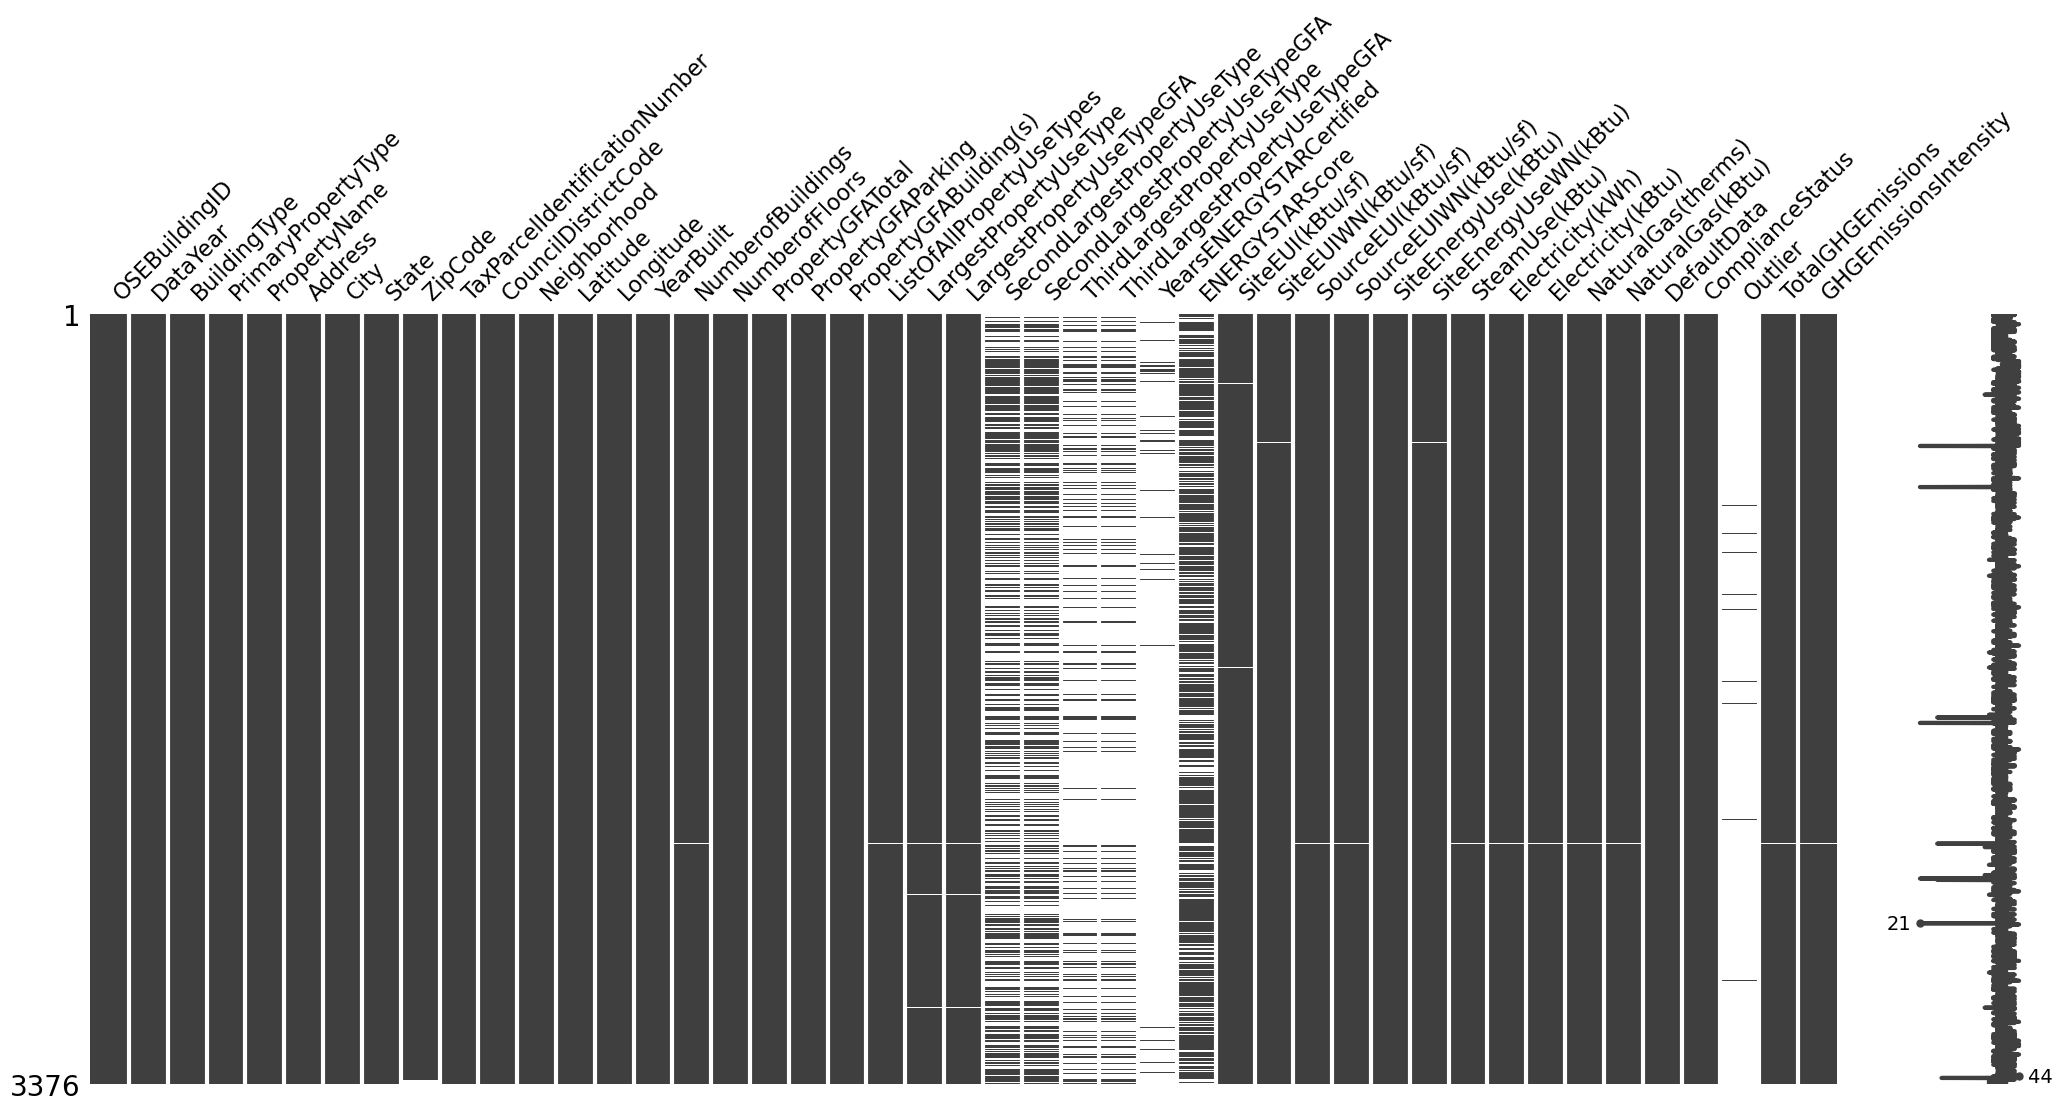

In [9]:
msno.matrix(df_data) 

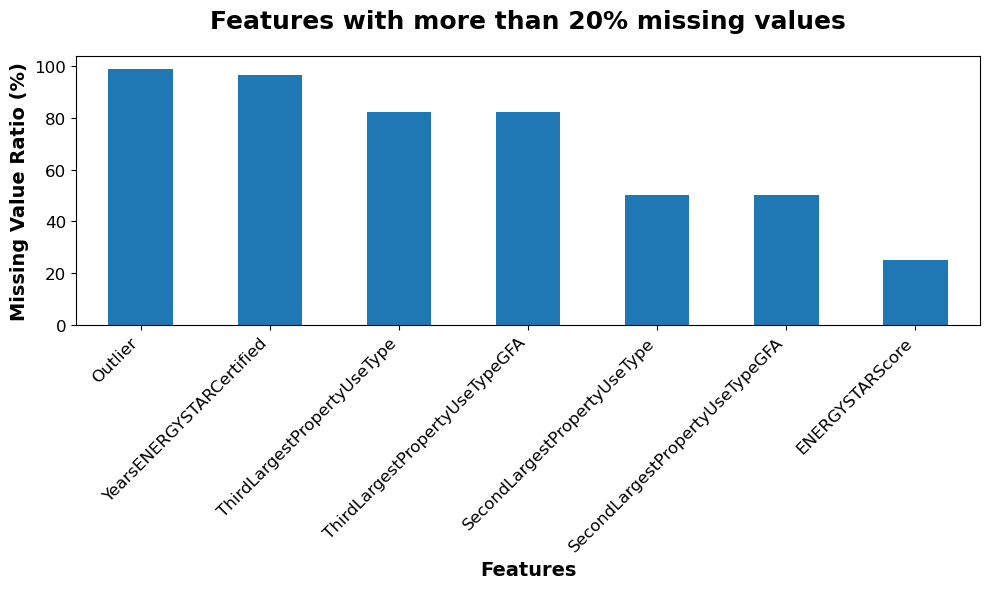

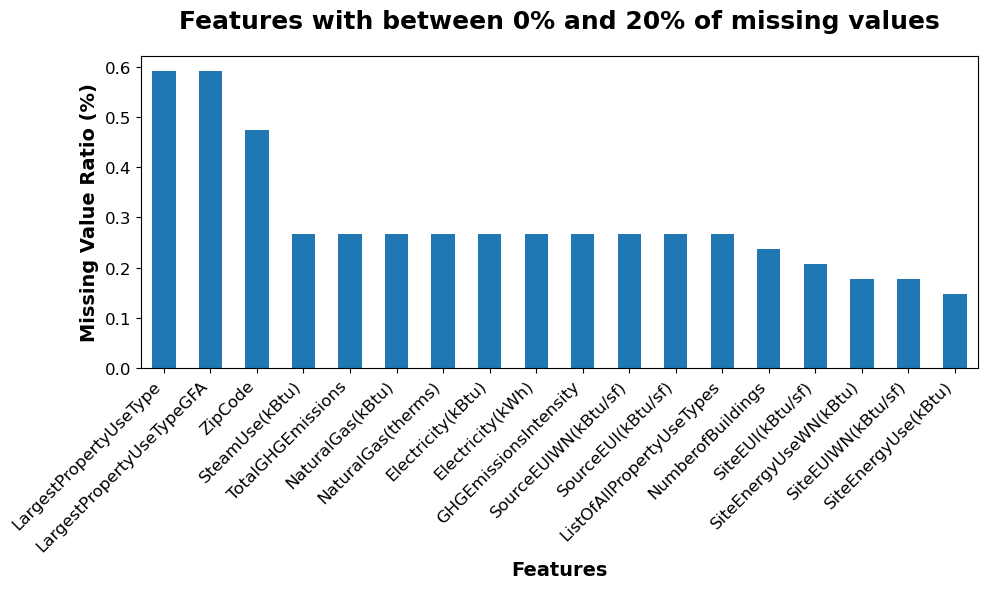

In [10]:
# ==================================================================================================
# PLOT MISSING VALUE RATIO BY FEATURES
# ==================================================================================================
# Calculate the total number of missing values for each feature
missing_values = df_data.isnull().sum()

# Calculate the total number of rows in the DataFrame
total_rows = df_data.shape[0]

# Calculate the missing value ratio for each feature
missing_value_ratio = (missing_values / total_rows) * 100

# Filter features with more than 20% missing values
features_with_missing_values = missing_value_ratio[missing_value_ratio > 20].sort_values(ascending=False)

# Plot the features with more than 20% missing values
plt.figure(figsize=(10, 6))
features_with_missing_values.plot(kind='bar')
plt.title('Features with more than 20% missing values')
plt.xlabel('Features')
plt.ylabel('Missing Value Ratio (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Filter features between 0% and 20% of missing values
features_with_some_missing_values = missing_value_ratio[(missing_value_ratio > 0) & (missing_value_ratio <= 20)].sort_values(ascending=False)

# Plot the features between 0% and 20% of missing values
plt.figure(figsize=(10, 6))
features_with_some_missing_values.plot(kind='bar')
plt.title('Features with between 0% and 20% of missing values')
plt.xlabel('Features')
plt.ylabel('Missing Value Ratio (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## I.4. Correlation between numerical parameters

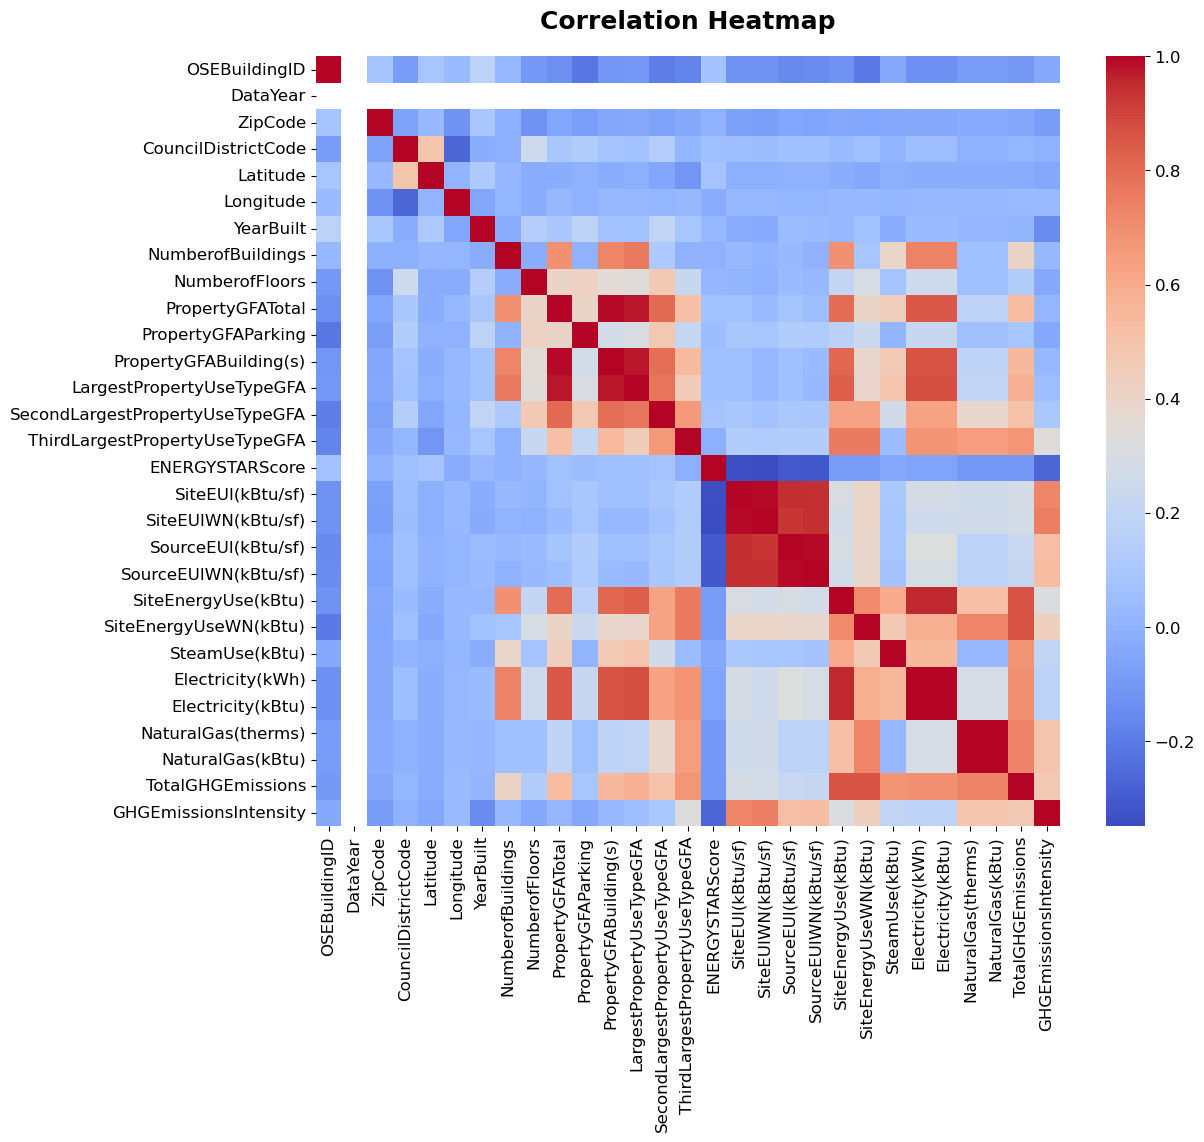

High Correlation: PropertyGFATotal - PropertyGFABuilding(s) = 0.99
High Correlation: PropertyGFATotal - LargestPropertyUseTypeGFA = 0.97
High Correlation: PropertyGFABuilding(s) - LargestPropertyUseTypeGFA = 0.98
High Correlation: SiteEUI(kBtu/sf) - SiteEUIWN(kBtu/sf) = 0.99
High Correlation: SiteEUI(kBtu/sf) - SourceEUI(kBtu/sf) = 0.94
High Correlation: SiteEUI(kBtu/sf) - SourceEUIWN(kBtu/sf) = 0.94
High Correlation: SiteEUIWN(kBtu/sf) - SourceEUI(kBtu/sf) = 0.93
High Correlation: SiteEUIWN(kBtu/sf) - SourceEUIWN(kBtu/sf) = 0.94
High Correlation: SourceEUI(kBtu/sf) - SourceEUIWN(kBtu/sf) = 0.99
High Correlation: SiteEnergyUse(kBtu) - Electricity(kWh) = 0.96
High Correlation: SiteEnergyUse(kBtu) - Electricity(kBtu) = 0.96
High Correlation: Electricity(kWh) - Electricity(kBtu) = 1.00
High Correlation: NaturalGas(therms) - NaturalGas(kBtu) = 1.00


In [11]:
# ==================================================================================================
# PLOT CORRELATION HEATMAP
# ==================================================================================================
correlation_matrix = df_data[numeric_features].corr()

# Set a larger figure size
plt.figure(figsize=(12, 10))
heatmap  = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")

# Increase fontsize for x-axis and y-axis titles
heatmap.set_xlabel(heatmap.get_xlabel())
heatmap.set_ylabel(heatmap.get_ylabel())

plt.title('Correlation Heatmap')

plt.show()


# Find pairs with correlation greater than 0.9 or less than -0.9
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > 0.9:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation)
            high_correlation_pairs.append(pair)

# Display the high correlation pairs
for pair in high_correlation_pairs:
    print(f"High Correlation: {pair[0]} - {pair[1]} = {pair[2]:.2f}")

In [12]:
# ==================================================================================================
# CREATE PARAMETERS BEFORE REMOVING FEATURE TARGET LEAKAGE (ITERATIF PROCESS)
# Feature Engineering
# ==================================================================================================
# Fonction conditionnelle pour créer les nouvelles colonnes
def create_usage_column(value):
    if value == 0:
        return 0
    else:
        return 1

# ENERGY SOURCE USAGE
df_data['SteamUse(kBtu)_Usage'] = df_data['SteamUse(kBtu)'].apply(create_usage_column)
df_data['Electricity(kBtu)_Usage'] = df_data['Electricity(kBtu)'].apply(create_usage_column)
df_data['NaturalGas(kBtu)_Usage'] = df_data['NaturalGas(kBtu)'].apply(create_usage_column)

# ENERGY SOURCE PROPORTION
df_data['TotalEnergy'] = df_data['SiteEUIWN(kBtu/sf)'] + df_data['SourceEUIWN(kBtu/sf)'] + df_data['SteamUse(kBtu)'] + df_data['Electricity(kBtu)'] + df_data['NaturalGas(kBtu)'] # We cannot keep it for data leakagge 
df_data['Proportion_Electricity'] = df_data['Electricity(kBtu)'] / df_data['TotalEnergy']
df_data['Proportion_NaturalGas'] = df_data['NaturalGas(kBtu)'] / df_data['TotalEnergy']
df_data['Proportion_SteamUse'] = df_data['SteamUse(kBtu)'] / df_data['TotalEnergy']
df_data.drop(columns=['TotalEnergy'], inplace=True)

# Calculate energy intensity ratios
df_data['TotalBuildingSize'] = df_data['PropertyGFABuilding(s)'] + df_data['PropertyGFAParking']
df_data['Electricity_Intensity'] = df_data['Electricity(kBtu)'] / df_data['TotalBuildingSize']
df_data['NaturalGas_Intensity'] = df_data['NaturalGas(kBtu)'] / df_data['TotalBuildingSize']
df_data['SteamUse_Intensity'] = df_data['SteamUse(kBtu)'] / df_data['TotalBuildingSize']

# Energy Usage Categories by Building Type: 
df_data['Electricity_Used_Office'] = df_data['Electricity(kBtu)_Usage'] * (df_data['PrimaryPropertyType'] == 'Office')
df_data['Electricity_Used_Retail'] = df_data['Electricity(kBtu)_Usage'] * (df_data['PrimaryPropertyType'] == 'Retail Store')
df_data['Electricity_Used_Hotel'] = df_data['Electricity(kBtu)_Usage'] * (df_data['PrimaryPropertyType'] == 'Hotel')


# ==================================================================================================
# REMOVE PARAMETERS - CORRELATION MATRIX
# ==================================================================================================
df_data = df_data.drop(columns = "NaturalGas(therms)")
df_data = df_data.drop(columns = "Electricity(kWh)")
df_data = df_data.drop(columns = "SiteEUI(kBtu/sf)")
df_data = df_data.drop(columns = "SourceEUI(kBtu/sf)")
df_data = df_data.drop(columns = "SiteEnergyUse(kBtu)")


# Remove the dropped columns from the numeric features list
numeric_features.remove("NaturalGas(therms)")
numeric_features.remove("Electricity(kWh)")
numeric_features.remove("SiteEUI(kBtu/sf)")
numeric_features.remove("SourceEUI(kBtu/sf)")
numeric_features.remove("SiteEnergyUse(kBtu)")



# ==================================================================================================
# REMOVE PARAMETERS - TARGET LEAKAGE
'''
Now I am interested in the energy features [SiteEUIWN(kBtu/sf), SourceEUIWN(kBtu/sf), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu)].
If I use the energy consumption of the current year to predict the total emissions of these indicators for the same year,
I introduce future information into the model.

PROBLEM: I don't know when the prediction will be made and if these readings are already available.

If they are available, I don't have a target leakage problem.
If they are not, I have one.
--> So I remove these features to be safe. 
'''
# ==================================================================================================

df_data = df_data.drop(columns = "GHGEmissionsIntensity") # TARGET LEAKAGE POSSIBLE
df_data = df_data.drop(columns = "SiteEUIWN(kBtu/sf)")
df_data = df_data.drop(columns = "SourceEUIWN(kBtu/sf)")
df_data = df_data.drop(columns = "SteamUse(kBtu)")
df_data = df_data.drop(columns = "Electricity(kBtu)")
df_data = df_data.drop(columns = "NaturalGas(kBtu)")


# Remove the dropped columns from the numeric features list
numeric_features.remove("GHGEmissionsIntensity") # TARGET LEAKAGE POSSIBLE
numeric_features.remove("SiteEUIWN(kBtu/sf)")
numeric_features.remove("SourceEUIWN(kBtu/sf)")
numeric_features.remove("SteamUse(kBtu)")
numeric_features.remove("Electricity(kBtu)")
numeric_features.remove("NaturalGas(kBtu)")



## I.5. Correction of Neighborhood

In [13]:
# Normalize values in the 'Neighborhood' column to uppercase
df_data['Neighborhood'] = df_data['Neighborhood'].str.upper()

## I.6. Correction of PropertyName

In [14]:
# Check for duplicates in the 'PropertyName' column
duplicate_property_names = df_data[df_data.duplicated(subset=['PropertyName'], keep=False)]

# Display the full rows for the duplicates
display(duplicate_property_names)

# Filter duplicate_property_names based on TaxParcelIdentificationNumber
duplicate_with_same_tax_parcel = duplicate_property_names[duplicate_property_names.duplicated(subset=['TaxParcelIdentificationNumber'], keep=False)]

# Display the full rows for the duplicates with the same TaxParcelIdentificationNumber
display(duplicate_with_same_tax_parcel)

OSEBuildingID  DataYear          BuildingType  \
89              131      2016        NonResidential   
162             261      2016                Campus   
323             460      2016        NonResidential   
905           20198      2016  Multifamily LR (1-4)   
1010          20500      2016        NonResidential   
1028          20542      2016  Multifamily LR (1-4)   
1158          21119      2016        NonResidential   
1272          21413      2016        NonResidential   
1324          21526      2016  Multifamily LR (1-4)   
1325          21527      2016  Multifamily LR (1-4)   
1338          21550      2016        NonResidential   
1462          21893      2016        NonResidential   
1556          22418      2016  Multifamily LR (1-4)   
1566          22486      2016        NonResidential   
1574          22521      2016  Multifamily LR (1-4)   
1644          22956      2016  Multifamily LR (1-4)   
1800          23451      2016  Multifamily MR (5-9)   
1929          23867      2016        NonResidential   
1965          23963      2016        NonResidential   
1968          23971      2016        NonResidential   
2075          24363      2016  Multifamily LR (1-4)   
2081          24391      2016  Multifamily LR (1-4)   
2367          25418      2016  Multifamily LR (1-4)   
2492          25847      2016        NonResidential   
2609          26240      2016  Multifamily LR (1-4)   
2966          27681      2016  Multifamily LR (1-4)   
3266          49944      2016  Multifamily MR (5-9)   

              PrimaryPropertyType                PropertyName  \
89                          Other                    Lakeview   
162                  Large Office                  South Park   
323                  Large Office             Northgate Plaza   
905          Low-Rise Multifamily     Garden Court Apartments   
1010                    Warehouse                Central Park   
1028         Low-Rise Multifamily        Crestview Apartments   
1158                    Warehouse              Canal Building   
1272  Small- and Mid-Sized Office                    Fairview   
1324         Low-Rise Multifamily                    Lakeview   
1325         Low-Rise Multifamily                    Parkside   
1338  Small- and Mid-Sized Office            Bayview Building   
1462                    Warehouse                  South Park   
1556         Low-Rise Multifamily                Central Park   
1566  Small- and Mid-Sized Office              Canal Building   
1574         Low-Rise Multifamily     Garden Court Apartments   
1644        Senior Care Community             Northgate Plaza   
1800         Mid-Rise Multifamily                    Fairview   
1929  Small- and Mid-Sized Office                 Airport Way   
1965                    Warehouse            Bayview Building   
1968       Refrigerated Warehouse                 Airport Way   
2075         Low-Rise Multifamily  Jefferson Court Apartments   
2081         Low-Rise Multifamily  Jefferson Court Apartments   
2367         Low-Rise Multifamily                    Parkside   
2492  Small- and Mid-Sized Office               Pine Building   
2609         Low-Rise Multifamily             Northgate Plaza   
2966         Low-Rise Multifamily        Crestview Apartments   
3266           Mixed Use Property               Pine Building   

                        Address     City State  ZipCode  \
89              1208 NE 64th st  Seattle    WA  98115.0   
162              1420 S Trenton  Seattle    WA  98108.0   
323             9709 3rd Ave NE  Seattle    WA  98115.0   
905   6334 Rainier Avenue South  Seattle    WA  98118.0   
1010             5614 7th Ave S  Seattle    WA  98108.0   
1028                3630 Renton  Seattle    WA  98144.0   
1158              712 N 34th St  Seattle    WA  98103.0   
1272        1000 Fairview Ave N  Seattle    WA  98109.0   
1324       1555 Lakeview Blvd E  Seattle    WA  98102.0   
1325           1203 NE 135th St  Seattle    WA  98125.

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEnergyUseWN(kBtu), DefaultData, ComplianceStatus, Outlier, TotalGHGEmissions, SteamUse(kBtu)_Usage, Electricity(kBtu)_Usage, NaturalGas(kBtu)_Usage, Proportion_Electricity, Proportion_NaturalGas, Proportion_SteamUse, TotalBuildingSize, Electricity_Intensity, NaturalGas_Intensity, SteamUse_Intensity, Electricity_Used_Office, Electricity_Used_Retail, Electricity_Used_Hotel]
Index: []

# II. DUPLICATES

In [15]:
# ==================================================================================================
# CHECK FOR DUPLICATES
# ==================================================================================================
# Is there duplicate for the full row? NO.
duplicate_rows = df_data[df_data.duplicated(keep=False)]
display(duplicate_rows)
# Is there duplicate for 'OSEBuildingID' ? NO.
duplicate_rows = df_data[df_data.duplicated(subset='OSEBuildingID', keep=False)]
display(duplicate_rows)


Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEnergyUseWN(kBtu), DefaultData, ComplianceStatus, Outlier, TotalGHGEmissions, SteamUse(kBtu)_Usage, Electricity(kBtu)_Usage, NaturalGas(kBtu)_Usage, Proportion_Electricity, Proportion_NaturalGas, Proportion_SteamUse, TotalBuildingSize, Electricity_Intensity, NaturalGas_Intensity, SteamUse_Intensity, Electricity_Used_Office, Electricity_Used_Retail, Electricity_Used_Hotel]
Index: []

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEnergyUseWN(kBtu), DefaultData, ComplianceStatus, Outlier, TotalGHGEmissions, SteamUse(kBtu)_Usage, Electricity(kBtu)_Usage, NaturalGas(kBtu)_Usage, Proportion_Electricity, Proportion_NaturalGas, Proportion_SteamUse, TotalBuildingSize, Electricity_Intensity, NaturalGas_Intensity, SteamUse_Intensity, Electricity_Used_Office, Electricity_Used_Retail, Electricity_Used_Hotel]
Index: []

# III. OUTLIERS

## III.1. Negative Values

In [16]:
# ==================================================================================================
# REMOVE ROWS WITH NEGATIVE VALUES FOR TotalGHGEmissions and GHGEmissionsIntensity. 
# ==================================================================================================
# Remove rows where either 'TotalGHGEmissions' or 'GHGEmissionsIntensity' is negative
df_data = df_data[(df_data['TotalGHGEmissions'] >= 0)]


In [17]:
df_data[(df_data['TotalGHGEmissions'] < 0)]

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEnergyUseWN(kBtu), DefaultData, ComplianceStatus, Outlier, TotalGHGEmissions, SteamUse(kBtu)_Usage, Electricity(kBtu)_Usage, NaturalGas(kBtu)_Usage, Proportion_Electricity, Proportion_NaturalGas, Proportion_SteamUse, TotalBuildingSize, Electricity_Intensity, NaturalGas_Intensity, SteamUse_Intensity, Electricity_Used_Office, Electricity_Used_Retail, Electricity_Used_Hotel]
Index: []

## III.2. Keeping only the non residentials categories from 'BuildingType'

In [18]:
# ==================================================================================================
# REMOVE ALL RESIDENTIALS RELATED ROWS
# ==================================================================================================
df_data['BuildingType'].unique()

# ROWS TO REMOVE
display(df_data[df_data['BuildingType'].str.contains("Multifamily")])

df_data = df_data[~df_data['BuildingType'].str.contains("Multifamily")]
df_data['BuildingType'].unique()

OSEBuildingID  DataYear          BuildingType   PrimaryPropertyType  \
9                13      2016  Multifamily MR (5-9)  Mid-Rise Multifamily   
165             265      2016  Multifamily MR (5-9)  Mid-Rise Multifamily   
173             280      2016  Multifamily MR (5-9)  Mid-Rise Multifamily   
188             296      2016  Multifamily LR (1-4)  Low-Rise Multifamily   
189             297      2016  Multifamily MR (5-9)  Mid-Rise Multifamily   
...             ...       ...                   ...                   ...   
3353          50090      2016  Multifamily MR (5-9)  Mid-Rise Multifamily   
3354          50092      2016  Multifamily MR (5-9)        Residence Hall   
3355          50093      2016  Multifamily MR (5-9)  Mid-Rise Multifamily   
3357          50095      2016  Multifamily MR (5-9)  Mid-Rise Multifamily   
3358          50098      2016  Multifamily LR (1-4)  Low-Rise Multifamily   

                      PropertyName               Address     City State  \
9                    Lyon Building        607 - 3rd Ave.  Seattle    WA   
165         YWCA Opportunity Place       2024 3rd Avenue  Seattle    WA   
173                       Wintonia        1431 Minor Ave  Seattle    WA   
188   Cooper School Artist's Lofts  4408 Delridge Way SW  Seattle    WA   
189                LAKE CITY COURT     12730 33RD AVE NE  Seattle    WA   
...                            ...                   ...      ...   ...   
3353          131910 - LIV Seattle  4717 Brooklyn Ave NE  Seattle    WA   
3354       Terry Hall & Maple Hall   1101 NE Campus Pkwy  Seattle    WA   
3355                 Raven Terrace        820 Yesler Way  Seattle    WA   
3357                Broadstone Sky      4745 40th Ave SW  Seattle    WA   
3358                          1806      1806 23rd Avenue  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
9     98104.0                    0939000105                    7     DOWNTOWN   
165   98121.0                    8729690000                    7     DOWNTOWN   
173   98101.0                    8725600350                    7         EAST   
188   98106.0                    3388120000                    1     DELRIDGE   
189   98125.0                    3993000000                    5        NORTH   
...       ...                           ...                  ...          ...   
3353  98105.0                    8817400110                    4    NORTHEAST   
3354  98195.0                    1142002345                    4    NORTHEAST   
3355  98104.0                    9822000080                    3         EAST   
3357  98116.0                    7579200395                    1    SOUTHWEST   
3358  98122.0                    1407300010                    3      CENTRAL   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
9        47.60    -122.33       1910                1.0               6   
165      47.61    -122.34       2003                1.0               7   
173      47.61    -122.33       1909                1.0               6   
188      47.56    -122.36       1917                1.0               4   
189      47.72    -122.29       2009                1.0               6   
...        ...        ...        ...                ...             ...   
3353     47.66    -122.31       2015                1.0               7   
3354     47.66    -122.32       2015                1.0               7   
3355     47.60    -122.32       2015                1.0               6   
3357     47.56    -122.38       2015                1.0               7   
3358     47.62    -122.30       2014                1.0               4   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
9                63712                1496                   62216   
165             116947                   0                  116947   
173              51976                   0                   51976   
188              56617    

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

## III.3. Let's check if there are more family categories in the data. 

In [19]:
# ==================================================================================================
# REMOVE ALL RESIDENTIALS RELATED ROWS
# ==================================================================================================
# Let's check the LargestPropertyUseType for the NonResidential. 
# Define the list of building types to include
building_types = ['NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus', 'Nonresidential WA']

# Filter the DataFrame to get rows where 'BuildingType' is in the specified list
non_residential_data = df_data[df_data['BuildingType'].isin(building_types)]

# Get the unique values of 'LargestPropertyUseType' for the filtered DataFrame
unique_largest_property_use_types = non_residential_data['LargestPropertyUseType'].unique()

# ROWS TO REMOVE
display(unique_largest_property_use_types)

# Print the unique values
print("Unique values of 'LargestPropertyUseType' for NonResidential buildings:")
print(unique_largest_property_use_types)

# Note: We can see the apparition of Multifamily Housing. 

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', nan, 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing

Unique values of 'LargestPropertyUseType' for NonResidential buildings:
['Hotel' 'Police Station' 'Other - Entertainment/Public Assembly'
 'Library' 'Fitness Center/Health Club/Gym' 'Social/Meeting Hall'
 'Courthouse' 'Other' 'K-12 School' 'College/University'
 'Automobile Dealership' 'Office' 'Self-Storage Facility'
 'Non-Refrigerated Warehouse' 'Other - Mall' 'Senior Care Community'
 'Medical Office' 'Retail Store' 'Hospital (General Medical & Surgical)'
 'Museum' 'Repair Services (Vehicle, Shoe, Locksmith, etc)'
 'Other - Lodging/Residential' 'Residence Hall/Dormitory'
 'Other/Specialty Hospital' 'Financial Office' 'Distribution Center'
 'Parking' 'Multifamily Housing' 'Worship Facility' 'Restaurant'
 'Data Center' 'Laboratory' 'Supermarket/Grocery Store'
 'Convention Center' 'Urgent Care/Clinic/Other Outpatient' nan
 'Other - Services' 'Strip Mall' 'Wholesale Club/Supercenter'
 'Refrigerated Warehouse' 'Manufacturing/Industrial Plant'
 'Other - Recreation' 'Lifestyle Center' 'Other

In [20]:
# Filter the non_residential_data DataFrame for Multifamily Housing
multifamily_data = non_residential_data[non_residential_data['LargestPropertyUseType'] == 'Multifamily Housing']
display(multifamily_data)

# Filter the non_residential_data DataFrame for Multifamily Housing
multifamily_data = non_residential_data[non_residential_data['SecondLargestPropertyUseType'] == 'Multifamily Housing']
display(len(multifamily_data))

# Filter the non_residential_data DataFrame for Multifamily Housing
multifamily_data = non_residential_data[non_residential_data['ThirdLargestPropertyUseType'] == 'Multifamily Housing']
display(len(multifamily_data))

OSEBuildingID  DataYear    BuildingType   PrimaryPropertyType  \
164             264      2016  NonResidential    Mixed Use Property   
644           19445      2016  NonResidential  Low-Rise Multifamily   
1159          21122      2016  NonResidential    Mixed Use Property   
1300          21481      2016          Campus  Low-Rise Multifamily   
1839          23562      2016  NonResidential    Mixed Use Property   
2314          25222      2016  NonResidential    Mixed Use Property   
2394          25522      2016  NonResidential    Mixed Use Property   
2450          25674      2016  NonResidential  Low-Rise Multifamily   
2748          26834      2016  NonResidential    Mixed Use Property   
3003          27838      2016  NonResidential    Mixed Use Property   
3041          27969      2016  NonResidential    Mixed Use Property   
3087          29170      2016  NonResidential    Mixed Use Property   

                                 PropertyName  \
164                                   TriBeCa   
644                            Pacific Pointe   
1159           Fremont Court-Equinox Building   
1300                          Sanitary Market   
1839                      The Travelers Hotel   
2314                                  Olive 8   
2394                                YouthCare   
2450                   (ID25674) COMET TAVERN   
2748  (ID26834) SOO YUEN ASSOCIATION BUILDING   
3003                         Madison Crossing   
3041               1700 Madison Apts. Bldg. 2   
3087        Chief Seattle Club/Monterey Lofts   

                              Address     City State  ZipCode  \
164                     516 1st Ave W  Seattle    WA  98119.0   
644                2108 N Pacific St.  Seattle    WA  98103.0   
1159             3424 Fremont Ave. N.  Seattle    WA  98103.0   
1300                1525 FIrst Avenue  Seattle    WA  98101.0   
1839                    80 Yesler Way  Seattle    WA  98104.0   
2314                    737 Olive Way  Seattle    WA  98101.0   
2394                 5401 26th Ave NE  Seattle    WA  98105.0   
2450                    916 E PIKE ST  Seattle    WA  98122.0   
2748                525 MAYNARD AVE S  Seattle    WA  98104.0   
3003              1600 E. Madison St.  Seattle    WA  98122.0   
3041                1700 E Madison St  Seattle    WA  98122.0   
3087  410 2nd Avenue Extenstion South  Seattle    WA  98104.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
164                     8681450000                    7   
644                     0354000254                    4   
1159                    1972202755                    6   
1300                    1976200210                    7   
1839                    8670450000                    7   
2314                    6364000000                    7   
2394                    9191201460                    4   
2450                    6003500480                    3   
2748                    5247801900                    2   
3003                    7234600515                    3   
3041                    7234601100                    3   
3087                    1562700010                    3   

               Neighborhood  Latitude  Longitude  YearBuilt  \
164   MAGNOLIA / QUEEN ANNE     47.62    -122.36       2002   
644              LAKE UNION     47.65    -122.33       2000   
1159             LAKE UNION     47.65    -122.35       2001   
1300               DOWNTOWN     47.61    -122.34       1942   
1839               DOWNTOWN     47.60    -122.34       1913   
2314               DOWNTOWN     47.61    -122.33       2009   
2394              NORTHEAST     47.67    -122.30       1997   
2450                   EAST     47.61    -122.32       1910   
2748               DOWNTOWN     47.60    -122.33       1909   
3003                   EAST     47.62    -122.31       1998   
3041                CENTRAL     47.62    -122.31       2004   
3087                   EAST     47.60    -122.33       1900   

      Numb

12

12

In [21]:
# NOTE: We can see the apparition of some 'Low-Rise Multifamily' inside the 'NonResidential' and 'campus' categorie of BuildingType. 
# NOTE: It still exists Multi Family stuff inside PrimaryPropertyType, SecondLargestPropertyUseType or ThirdLargestPropertyUseType. Let's remove them?

# Define the list of columns to check for 'Multifamily' presence
columns_to_check = ['BuildingType', 'PrimaryPropertyType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']

# Initialize the filter condition
filter_condition = False

# Iterate over each column and update the filter condition
for column in columns_to_check:
    filter_condition |= df_data[column].str.contains("Multifamily")


# Filter the dataframe to remove rows with 'Multifamily' in any of the specified columns
data_anomalies = df_data[filter_condition]
display(data_anomalies)
# Remove the filtered rows from the dataframe
df_data = df_data[~filter_condition]


OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
289             419      2016          Campus           Mixed Use Property   
440             601      2016  NonResidential           Mixed Use Property   
466             627      2016  NonResidential  Small- and Mid-Sized Office   
488             657      2016  NonResidential           Mixed Use Property   
511             694      2016  NonResidential                 Large Office   
541             731      2016  NonResidential           Mixed Use Property   
612             817      2016  NonResidential           Mixed Use Property   
644           19445      2016  NonResidential         Low-Rise Multifamily   
912           20212      2016  NonResidential           Mixed Use Property   
922           20241      2016  NonResidential                        Other   
1167          21141      2016  NonResidential  Small- and Mid-Sized Office   
1300          21481      2016          Campus         Low-Rise Multifamily   
1315          21506      2016  NonResidential           Mixed Use Property   
1328          21533      2016  NonResidential           Mixed Use Property   
1599          22684      2016  NonResidential           Mixed Use Property   
1773          23368      2016  NonResidential           Mixed Use Property   
2398          25528      2016  NonResidential                 Large Office   
2407          25546      2016  NonResidential           Mixed Use Property   
2450          25674      2016  NonResidential         Low-Rise Multifamily   
2506          25886      2016  NonResidential  Small- and Mid-Sized Office   
2530          25992      2016  NonResidential           Mixed Use Property   
2759          26847      2016  NonResidential  Small- and Mid-Sized Office   
2791          26973      2016  NonResidential           Mixed Use Property   
3134          40348      2016  NonResidential           Mixed Use Property   
3163          49697      2016  NonResidential           Mixed Use Property   
3199          49776      2016  NonResidential                 Large Office   
3312          50026      2016  NonResidential  Small- and Mid-Sized Office   

                                   PropertyName  \
289                                 Main Market   
440                          Wallingford Center   
466                           Roebling Building   
488                        2200 Westlake - SEDO   
511                             Rainier Brewery   
541                     SALVATION ARMY (ID#731)   
612                                Russell Hall   
644                              Pacific Pointe   
912                      Market Street Holdings   
922                        neptune theatre bldg   
1167                            FREMONT FOUNDRY   
1300                            Sanitary Market   
1315                          Scargo Apartments   
1328                                Hyatt Place   
1599                    Murphy Ballard Building   
1773                          Seaboard Building   
2398                           Waterfront Place   
2407  Compass Housing Alliance - Pioneer Square   
2450                     (ID25674) COMET TAVERN   
2506                   H2125 - Western Triangle   
2530            2201 / Enso Condominiums - SEDO   
2759                         KOBE PARK BUILDING   
2791                                New Central   
3134                            Broadway Market   
3163                        Prudential Building   
3199                         Market Place Tower   
3312                              Chophouse Row   

                                      Address     City State  ZipCode  \
289                           1501 Pike Place  Seattle    WA  98101.0   
440                           1815 N 45th St.  Seattle    WA  98103.0   
466                      901 Occidental Ave S  Seattle    WA  98134.0   
488                        2200 Westlake Ave.  Seattle    WA  98121.0   
511                    3100

In [22]:
data_anomalies.shape

(27, 47)

## III.4. Feature 'Outlier'

Note: We don't have any informations about what means 'low outlier' or 'high outlier'. 
We just removed the rows. 

In [23]:
# ==================================================================================================
# REMOVE OUTLIERS based on 'Outlier'
# ==================================================================================================
# We remove all non NaN rows from the column Outlier
df_data = df_data[df_data['Outlier'].isna()]

df_data = df_data.drop(columns=['Outlier'])

## III.5. Feature 'ComplianceStatus'

In [24]:
# ==================================================================================================
# REMOVE OUTLIERS BASED on 'ComplianceStatus'. 
# ==================================================================================================
non_compliant_rows = df_data[df_data['ComplianceStatus'] != 'Compliant']
non_compliant_rows

# We remove all the non-compliant rows
df_data = df_data.drop(non_compliant_rows.index)



In [25]:
df_data

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3370          50221      2016  Nonresidential COS               Other   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3370          High Point Community Center  6920 34th Ave SW  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0     98101.0                    0659000030                    7   
1     98101.0                    0659000220                    7   
2     98101.0                    0659000475                    7   
3     98101.0                    0659000640                    7   
4     98121.0                    0659000970                    7   
...       ...                           ...                  ...   
3370      NaN                    2524039059                    1   
3372      NaN                    3558300000                    2   
3373      NaN                    1794501150                    7   
3374      NaN                    7883603155                    1   
3375      NaN                    7857002030                    2   

                Neighborhood  Latitude  Longitude  YearBuilt  \
0                   DOWNTOWN     47.61    -122.34       1927   
1                   DOWNTOWN     47.61    -122.33       1996   
2                   DOWNTOWN     47.61    -122.34       1969   
3                   DOWNTOWN     47.61    -122.34       1926   
4                   DOWNTOWN     47.61    -122.34       1980   
...                      ...       ...        ...        ...   
3370  DELRIDGE NEIGHBORHOODS     47.54    -122.37       1982   
3372                DOWNTOWN     47.60    -122.32       2004   
3373   MAGNOLIA / QUEEN ANNE     47.64    -122.36       1974   
3374        GREATER DUWAMISH     47.53    -122.32       1989   
3375        GREATER DUWAMISH     47.54    -122.30       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
2                   1.0              41            956110              196718   
3                   1.0              10             61320                   0   
4                   1.0              18            175580               62000   
...                 ...             ...               ...                 ...   
3370                1.0               1

# IV. ZERO

In [26]:
# ==================================================================================================
# FIND COLUMNS WHICH HAVE ZERO VALUES
# ==================================================================================================
# Find columns with zeros
columns_with_zeros = df_data.columns[(df_data == 0).any()]

## IV.1. NumberofBuildings
The value of 0 building is clearly an anomaly. 
Let's impute using KNN. 

In [27]:
# Find the rows with 0 building, and replace 0 by NaN. 
zero_building_rows = df_data[df_data['NumberofBuildings'] == 0]

# We replace the 0 from 'NumberofBuildings' by NaN
df_data['NumberofBuildings'] = df_data['NumberofBuildings'].replace(0, np.nan)

In [28]:
# # ==================================================================================================
# # DATA IMPUTATION - KNN (ONLY FOR 'NumberofBuildings' COLUMN)
# # ==================================================================================================
from sklearn.impute import KNNImputer
import pandas as pd

# Define the KNN imputer for 'NumberofBuildings' column only
knn_imputer = KNNImputer(n_neighbors=5)

# Impute missing values using KNN imputation for 'NumberofBuildings' column
df_data['NumberofBuildings'] = knn_imputer.fit_transform(df_data[['NumberofBuildings']])
df_data['NumberofBuildings'] = df_data['NumberofBuildings'].round().astype(int)  # Round to nearest integer


## IV.2. SecondLargestPropertyUseTypeGFA and ThirdLargestPropertyUseTypeGFA
The value of 0 building is clearly an anomaly. 
Let's impute using KNN. 

In [29]:
# # Select only the specified columns
# selected_columns = ['SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']
# # Filter rows where any of the specified columns have a value of 0
# zero_value_rows = df_data[(df_data[selected_columns] == 0).any(axis=1)]

# We replace the 0 from 'NumberofBuildings' by NaN
df_data['SecondLargestPropertyUseTypeGFA'] = df_data['SecondLargestPropertyUseTypeGFA'].replace(0, np.nan)
df_data['ThirdLargestPropertyUseTypeGFA'] = df_data['ThirdLargestPropertyUseTypeGFA'].replace(0, np.nan)

In [30]:
# # ==================================================================================================
# # DATA IMPUTATION - KNN (FOR SecondLargestPropertyUseTypeGFA and ThirdLargestPropertyUseTypeGFA COLUMN)
# # ==================================================================================================
from sklearn.impute import KNNImputer
import pandas as pd


# Define the KNN imputer for 'NumberofBuildings' column only
knn_imputer = KNNImputer(n_neighbors=5)

# Impute missing values using KNN imputation for 'NumberofBuildings' column
df_data['SecondLargestPropertyUseTypeGFA'] = knn_imputer.fit_transform(df_data[['SecondLargestPropertyUseTypeGFA']])
df_data['SecondLargestPropertyUseTypeGFA'] = df_data['SecondLargestPropertyUseTypeGFA'].round().astype(int)  # Round to nearest integer

# Impute missing values using KNN imputation for 'NumberofBuildings' column
df_data['ThirdLargestPropertyUseTypeGFA'] = knn_imputer.fit_transform(df_data[['ThirdLargestPropertyUseTypeGFA']])
df_data['ThirdLargestPropertyUseTypeGFA'] = df_data['ThirdLargestPropertyUseTypeGFA'].round().astype(int)  # Round to nearest integer


# V. Missing Values

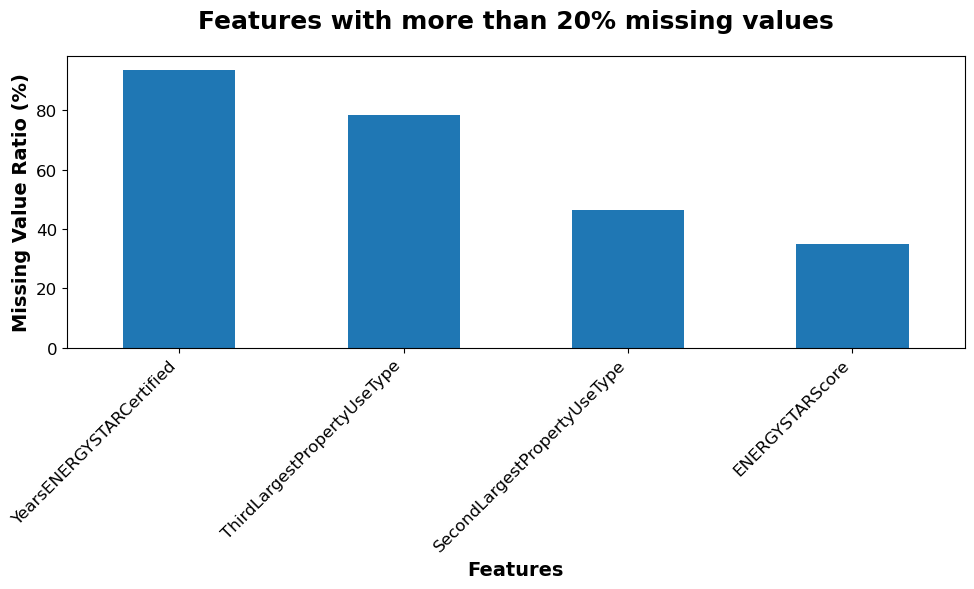

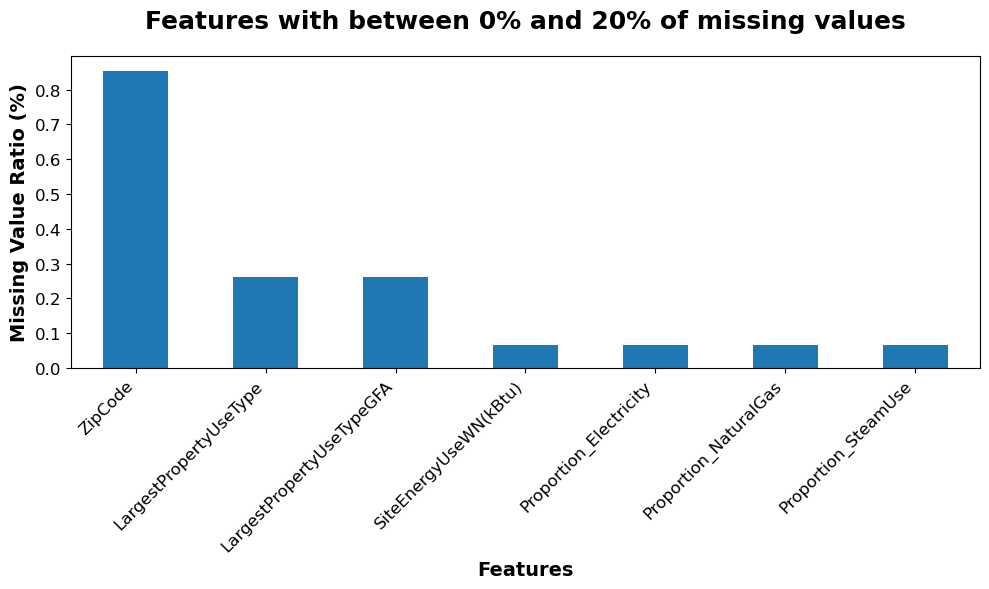

In [31]:
# ==================================================================================================
# PLOT MISSING VALUE RATIO BY FEATURES
# ==================================================================================================
# Calculate the total number of missing values for each feature
missing_values = df_data.isnull().sum()

# Calculate the total number of rows in the DataFrame
total_rows = df_data.shape[0]

# Calculate the missing value ratio for each feature
missing_value_ratio = (missing_values / total_rows) * 100

# Filter features with more than 20% missing values
features_with_missing_values = missing_value_ratio[missing_value_ratio > 20].sort_values(ascending=False)

# Plot the features with more than 20% missing values
plt.figure(figsize=(10, 6))
features_with_missing_values.plot(kind='bar')
plt.title('Features with more than 20% missing values')
plt.xlabel('Features')
plt.ylabel('Missing Value Ratio (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




# Filter features between 0% and 20% of missing values
features_with_some_missing_values = missing_value_ratio[(missing_value_ratio > 0) & (missing_value_ratio <= 20)].sort_values(ascending=False)

# Plot the features between 0% and 20% of missing values
plt.figure(figsize=(10, 6))
features_with_some_missing_values.plot(kind='bar')
plt.title('Features with between 0% and 20% of missing values')
plt.xlabel('Features')
plt.ylabel('Missing Value Ratio (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## V.1. Low missing values ZipCode, LargestPropertyUseType and LargestPropertyUseTypeGFA

In [32]:
# Columns with low missing values
# columns_with_low_missing = ['ZipCode', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SiteEnergyUseWN(kBtu)']
columns_with_low_missing = missing_value_ratio[missing_value_ratio <= 20].index.tolist()

# Calculate the total number of rows containing missing values for these columns
total_missing_rows = df_data[columns_with_low_missing].isna().any(axis=1).sum()

print("Total number of rows containing missing values for columns with low missing values:", total_missing_rows)


Total number of rows containing missing values for columns with low missing values: 18


In [33]:
# Remove rows containing missing values for specified columns
df_data.dropna(subset=columns_with_low_missing, inplace=True)


## V.2. High missing value 'ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType', 'ENERGYSTARScore'

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

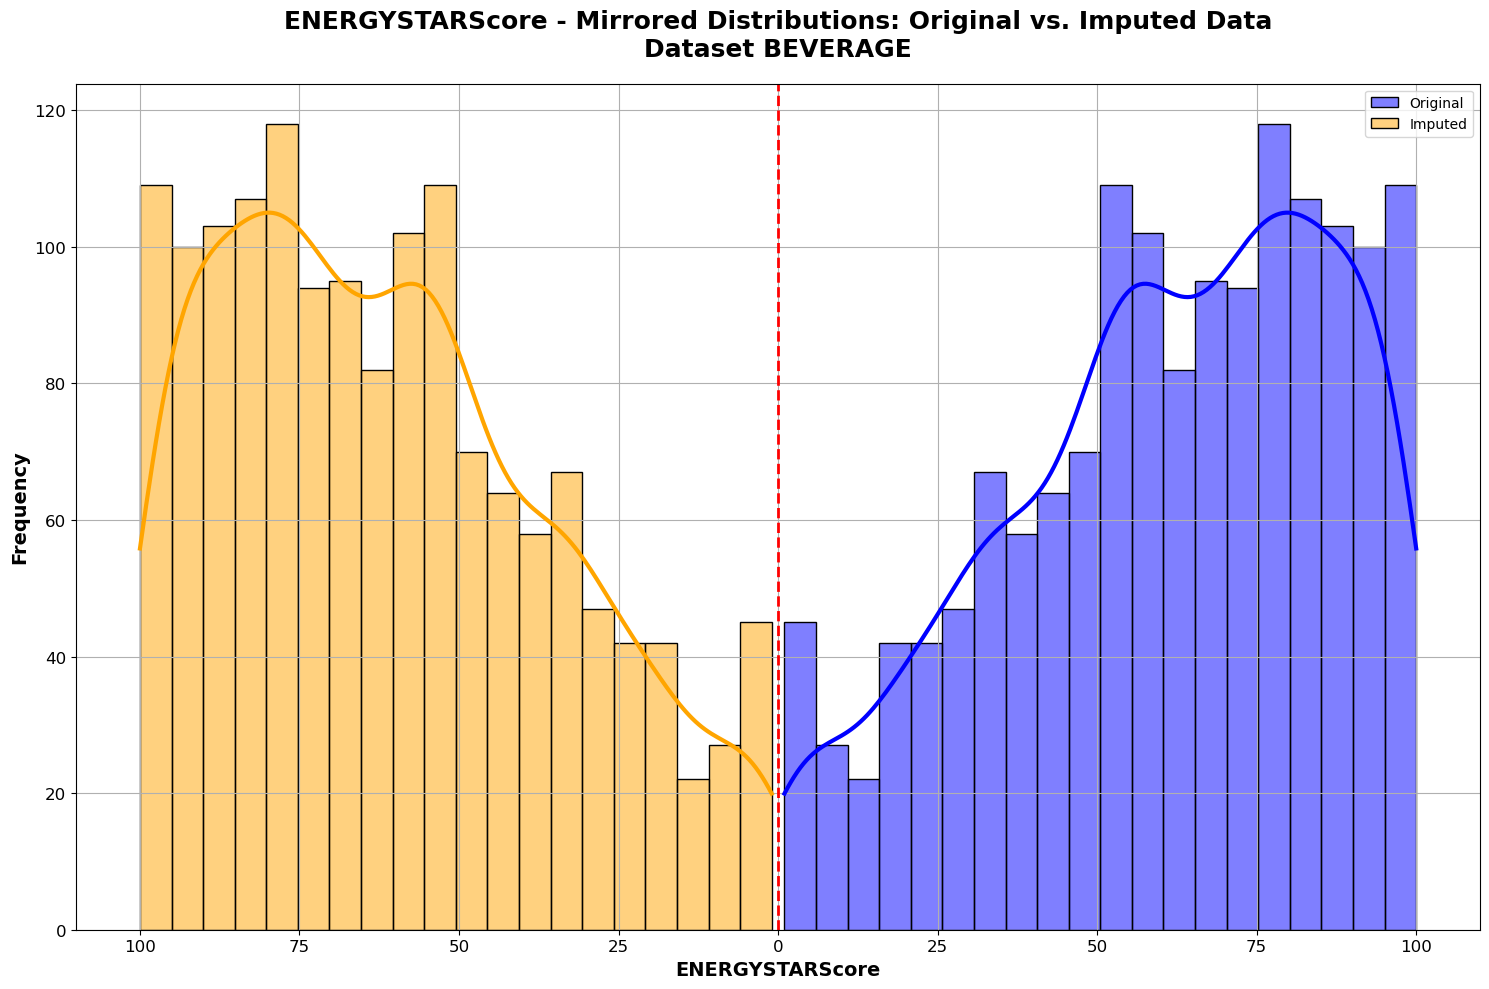

In [34]:
from missforest.missforest import MissForest
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer

def Miss_forest_impute_iterative(data, attr, dtype, num_iterations, name_notnan='Training', name_nan='Predict'):
    null_pos = data[attr].isnull()
    data.loc[~null_pos, 'Label'] = name_notnan
    data.loc[null_pos, 'Label'] = name_nan
    
    for _ in range(num_iterations):
        # Separate training and prediction data
        train_data = data[data['Label'] == 'Training']
        test_data = data[data['Label'] == 'Predict']

        # Separate features and target variable
        Y = train_data[[attr]]
        X = train_data.drop(['Label', attr], axis=1)

        # Initialize model
        if dtype == 'Continuous':
            model = RandomForestRegressor()
        elif dtype == 'Categorical':
            model = RandomForestClassifier()

        # Fit the model
        model.fit(X, Y)

        # Prediction set features
        x_test = test_data.drop(['Label', attr], axis=1)

        # Predict missing values
        y_pred = model.predict(x_test)

        # Replace missing values with predicted values
        data.loc[data['Label'] == 'Predict', attr] = y_pred

    return data
    
# # ==================================================================================================
# # DATA IMPUTATION - MissForest (ONLY FOR 'ENERGYSTARScore' COLUMN)
# # ==================================================================================================
df_copy = df_data.select_dtypes(include=['float64', 'int64'])
# df_copy = df_data[numerical_features]
# Impute missing values iteratively
df_imputed_energy_score = Miss_forest_impute_iterative(df_copy, 'ENERGYSTARScore', 'Continuous', 5)
# Update the 'ENERGYSTARScore' column in df_data with the imputed values
df_data['ENERGYSTARScore'] = df_imputed_energy_score['ENERGYSTARScore']


# ===========================================================================
# Data IMPUTATION - CATEGORICAL ORDINAL Features
# PLOT
# ===========================================================================
# Create a single figure with subplots
plt.figure(figsize=(15, 10))

sns.histplot(df_copy['ENERGYSTARScore'], kde=True, color='blue', label='Original', bins=20)

# Plot histogram of imputed data
sns.histplot(-df_imputed_energy_score['ENERGYSTARScore'], kde=True, color='orange', label='Imputed', bins=20)

plt.title(f'ENERGYSTARScore - Mirrored Distributions: Original vs. Imputed Data\nDataset BEVERAGE', fontweight='bold', fontsize=18)
plt.xlabel('ENERGYSTARScore', fontweight='bold', fontsize=14)
plt.ylabel('Frequency', fontweight='bold', fontsize=14)
plt.gca().set_xticklabels([str(abs(int(x))) for x in plt.gca().get_xticks()])
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.grid(True)  # Add grid
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
missing_values_count = df_data['ENERGYSTARScore'].isnull().sum()
print("Number of missing values in ENERGYSTARScore column:", missing_values_count)

Number of missing values in ENERGYSTARScore column: 0


In [36]:
df_data

OSEBuildingID  DataYear       BuildingType          PrimaryPropertyType  \
0                 1      2016     NonResidential                        Hotel   
1                 2      2016     NonResidential                        Hotel   
2                 3      2016     NonResidential                        Hotel   
3                 5      2016     NonResidential                        Hotel   
4                 8      2016     NonResidential                        Hotel   
...             ...       ...                ...                          ...   
3339          50069      2016     NonResidential  Small- and Mid-Sized Office   
3340          50070      2016     NonResidential                        Other   
3347          50081      2016     NonResidential                  K-12 School   
3356          50094      2016     NonResidential           Mixed Use Property   
3359          50101      2016  Nonresidential WA                   University   

                     PropertyName                    Address     City State  \
0            Mayflower park hotel              405 Olive way  Seattle    WA   
1                 Paramount Hotel            724 Pine street  Seattle    WA   
2         5673-The Westin Seattle            1900 5th Avenue  Seattle    WA   
3                       HOTEL MAX             620 STEWART ST  Seattle    WA   
4     WARWICK SEATTLE HOTEL (ID8)              401 LENORA ST  Seattle    WA   
...                           ...                        ...      ...   ...   
3339      Airport - Main Terminal         7277 Perimeter Rd.  Seattle    WA   
3340     Tennis Center Sand Point  7135 Sportsfield Drive NE  Seattle    WA   
3347       Hamlin Robinson School        1701 20th Ave South  Seattle    WA   
3356                         AIBS        601 Westlake Ave N.  Seattle    WA   
3359                 Burke Museum       4331 Memorial Way NE  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0     98101.0                    0659000030                    7   
1     98101.0                    0659000220                    7   
2     98101.0                    0659000475                    7   
3     98101.0                    0659000640                    7   
4     98121.0                    0659000970                    7   
...       ...                           ...                  ...   
3339  98108.0                    2824049007                    2   
3340  98155.0                    0225049062                    4   
3347  98144.0                    7548300840                    3   
3356  98109.0                    4088803385                    7   
3359  98195.0                    1625049001                    4   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0             DOWNTOWN     47.61    -122.34       1927                  1   
1             DOWNTOWN     47.61    -122.33       1996                  1   
2             DOWNTOWN     47.61    -122.34       1969                  1   
3             DOWNTOWN     47.61    -122.34       1926                  1   
4             DOWNTOWN     47.61    -122.34       1980                  1   
...                ...       ...        ...        ...                ...   
3339  GREATER DUWAMISH     47.53    -122.30       1929                  1   
3340         NORTHEAST     47.68    -122.26       2013                  1   
3347  GREATER DUWAMISH     47.59    -122.31       2015                  1   
3356        LAKE UNION     47.62    -122.34       2015                  1   
3359         NORTHEAST     47.66    -122.31       1962                  1   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                 12             88434                   0   
1                 11            103566               15064   
2                 41            956110              196718   
3                 10             61320                   0   
4                 18            

In [37]:
# ==================================================================================================
# DATA IMPUTATION -REPLACE BY A FIXED VALUE ('ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType')
# ==================================================================================================
# Define the columns where NaN values need to be replaced
columns_to_replace = ['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']

# Replace NaN values with the specified string
df_data[columns_to_replace] = df_data[columns_to_replace].fillna('NO OTHER PROPERTY USE')


# VI. Interactive map of Seattle with the corresponding POI from the cleaned data

In [38]:
df_data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'University',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Warehouse', 'K-12 School', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant'], dtype=object)

In [39]:
# ==================================================================================================
# DISPLAY AN INTERACTIVE MAP OF SEATLE WITH THE CORRESPONDING POI. 
# ==================================================================================================
import folium
import folium.plugins

#Coordonnées du centre de Seattle
seattle_lat = 47.6062
seattle_lon = -122.3321

seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)


# Define a dictionary mapping property types to icon colors or names
property_icons = {
    'Hotel': 'red',
    'Other': 'blue',
    'Mixed Use Property': 'green',
    'University': 'orange',
    'Small- and Mid-Sized Office': 'purple',
    'Self-Storage Facility': 'gray',
    'Warehouse': 'black',
    'K-12 School': 'darkred',
    'Large Office': 'lightblue',
    'Senior Care Community': 'darkgreen',
    'Medical Office': 'pink',
    'Retail Store': 'lightred',
    'Hospital': 'cadetblue',
    'Residence Hall': 'darkpurple',
    'Distribution Center': 'beige',
    'Worship Facility': 'darkblue',
    'Supermarket / Grocery Store': 'lightgreen',
    'Laboratory': 'darkgray',
    'Refrigerated Warehouse': 'lightgray',
    'Restaurant': 'red'
}


# Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, ptn, prop_type in zip(df_data.Latitude, df_data.Longitude, df_data.PropertyName, df_data.PrimaryPropertyType):
    icon_color = property_icons.get(prop_type, 'blue')  # Default to blue if property type not found in dictionary
    folium.Marker(location=[lat, lng], popup=ptn, icon=folium.Icon(color=icon_color)).add_to(marker_cluster)

seattle_map

C:\Users\Olivi\AppData\Local\Temp\ipykernel_24360\314363612.py:43: UserWarning: color argument of Icon should be one of: {'green', 'darkblue', 'orange', 'black', 'red', 'purple', 'cadetblue', 'blue', 'white', 'darkred', 'lightblue', 'darkgreen', 'pink', 'lightred', 'darkpurple', 'lightgreen', 'lightgray', 'gray', 'beige'}.
  folium.Marker(location=[lat, lng], popup=ptn, icon=folium.Icon(color=icon_color)).add_to(marker_cluster)


# VII. TARGETS
Note: We aim to "predict the CO2 emissions and total energy consumption of non-residential buildings for which they have not yet been measured.
We add OSEBuildingID to provide the unicity of properties. 

In [40]:
df_targets = df_data[['OSEBuildingID','TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)']]

In [41]:
# Remove targets from df_data. 
df_data = df_data.drop(columns=['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)'])

In [42]:
df_targets

OSEBuildingID  TotalGHGEmissions  SiteEnergyUseWN(kBtu)
0                 1             249.98               7.46e+06
1                 2             295.86               8.66e+06
2                 3            2089.28               7.39e+07
3                 5             286.43               6.95e+06
4                 8             505.01               1.47e+07
...             ...                ...                    ...
3339          50069             134.80               4.73e+06
3340          50070              67.65               3.20e+06
3347          50081               9.24               1.40e+06
3356          50094            1000.06               4.11e+07
3359          50101              22.17               3.18e+06

[1503 rows x 3 columns]

# VIII. FEATURES SELECTION

In [43]:
df_data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'DefaultData',
       'ComplianceStatus', 'SteamUse(kBtu)_Usage', 'Electricity(kBtu)_Usage',
       'NaturalGas(kBtu)_Usage', 'Proportion_Electricity',
       'Proportion_NaturalGas', 'Proportion_SteamUse', 'TotalBuildingSize',
       'Electricity_Intensity', 'NaturalGas_Intensity', 'SteamUse_Intensity',
       'Electricity_U

In [44]:
columns_to_remove = ['DataYear', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber',
                     'CouncilDistrictCode', 'Latitude', 'Longitude', 'YearsENERGYSTARCertified',
                     'ComplianceStatus', 'DefaultData']

df_data.drop(columns=columns_to_remove, inplace=True)

# IX. Analyse Univariée

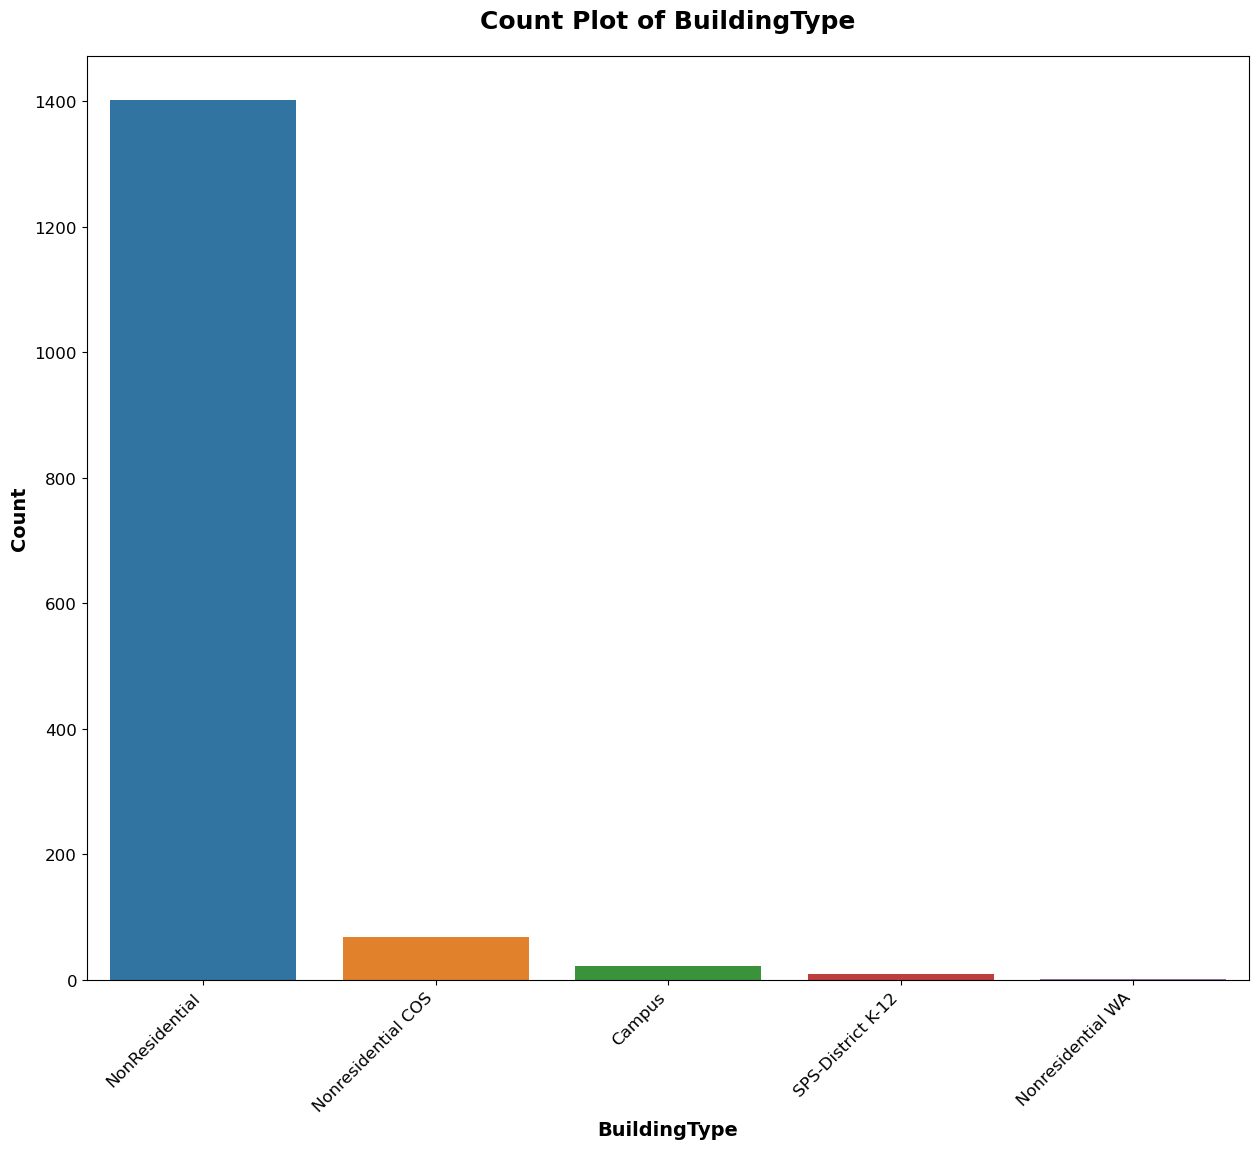

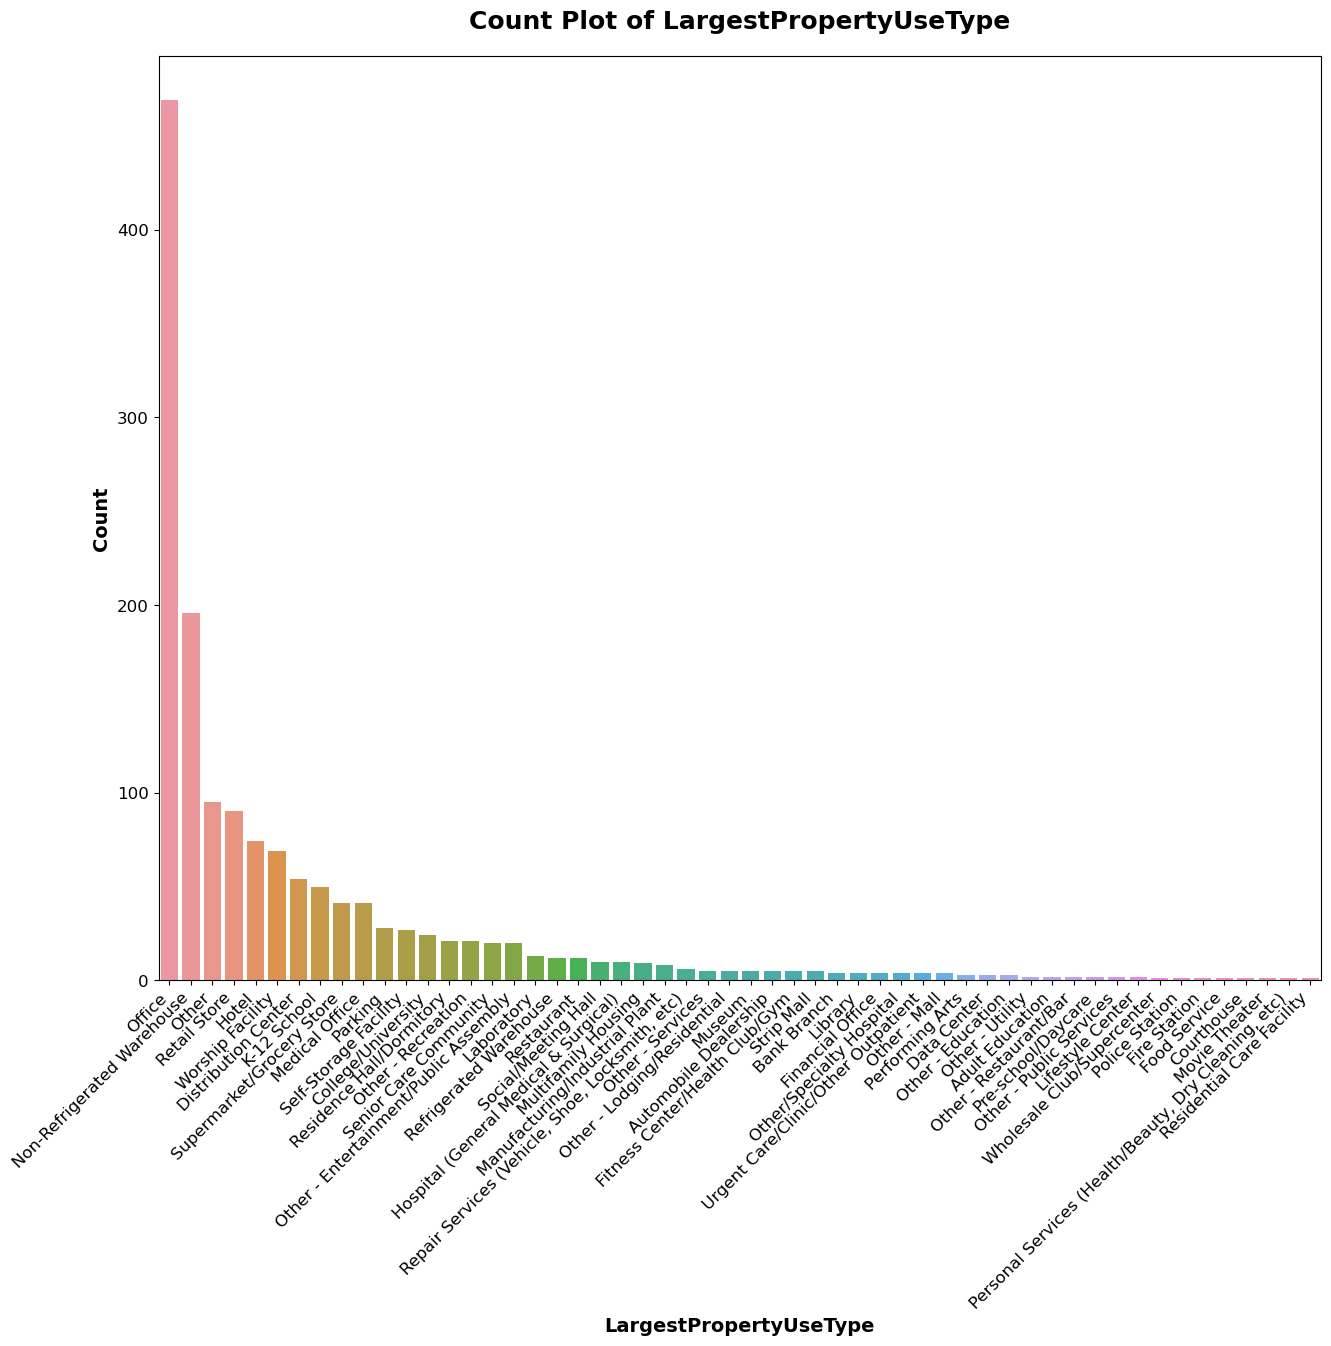

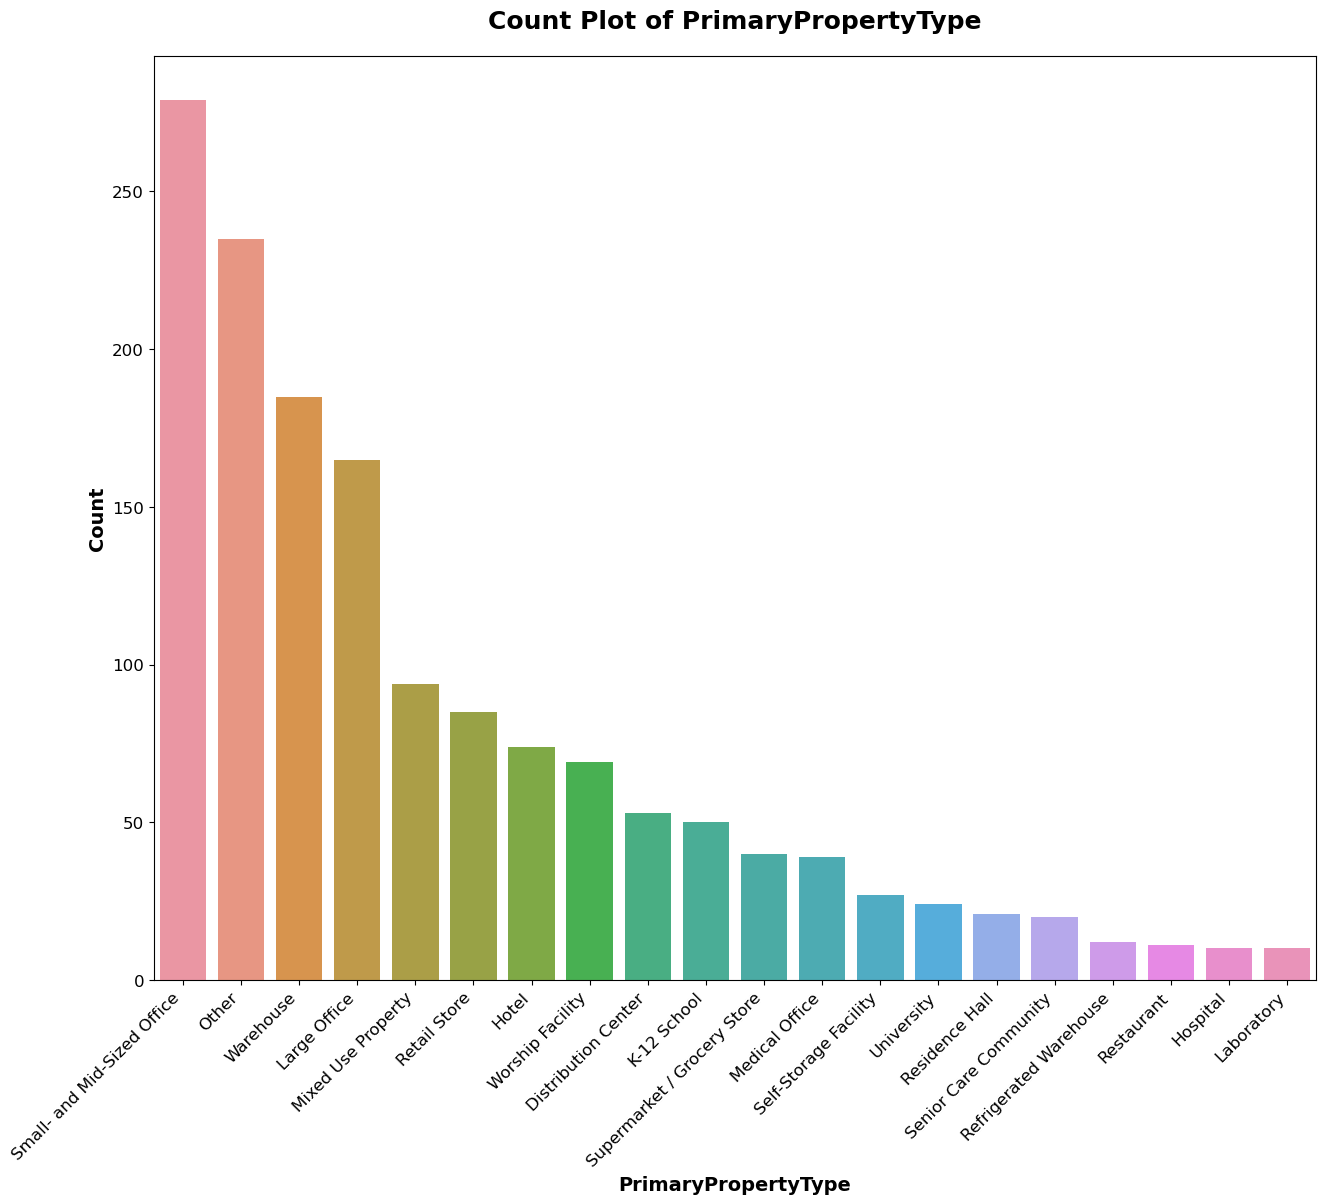

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


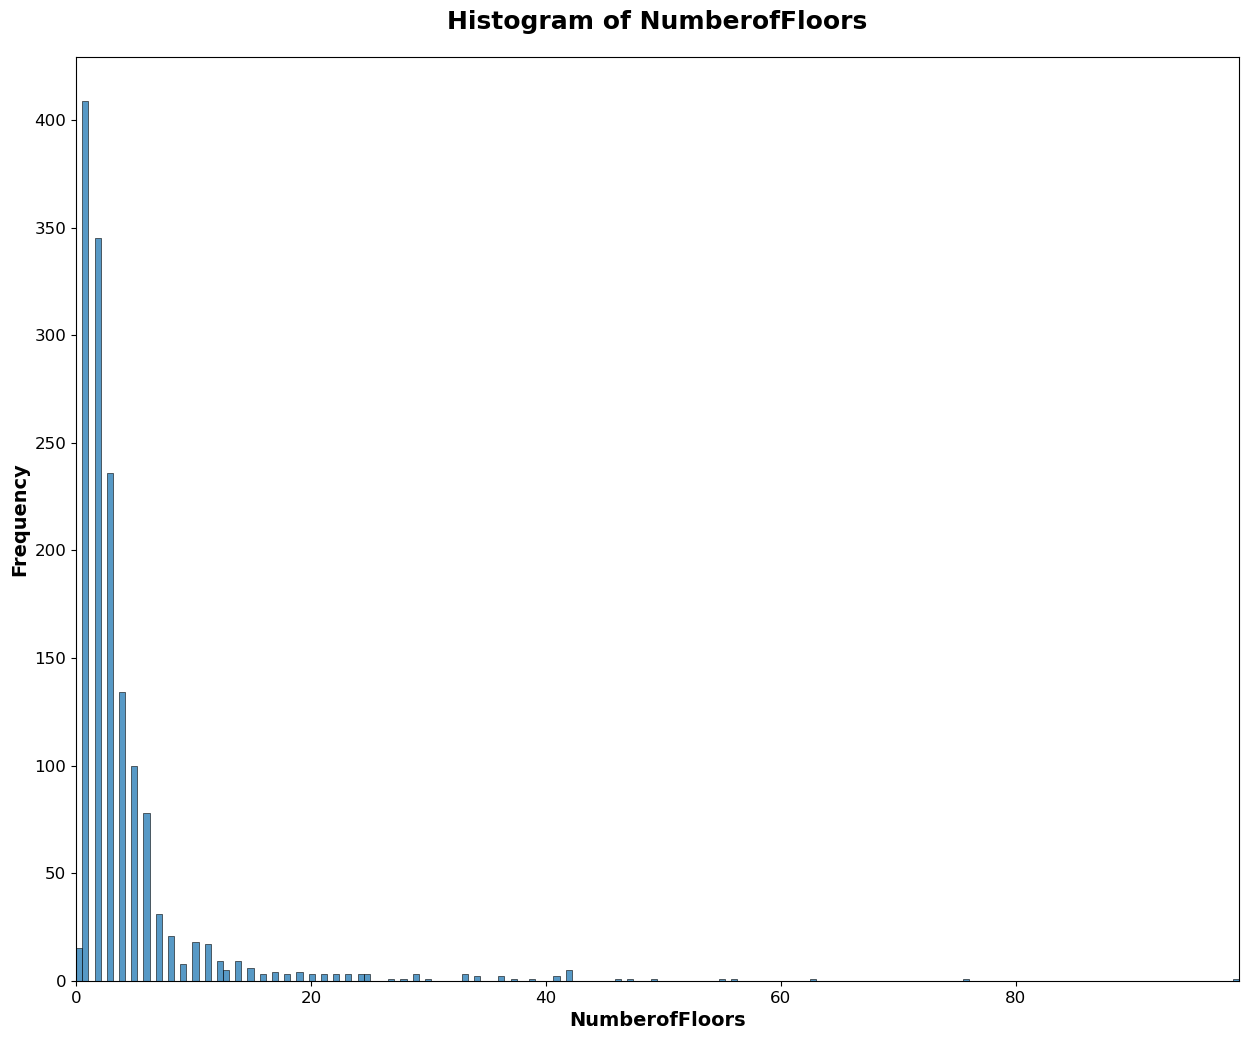

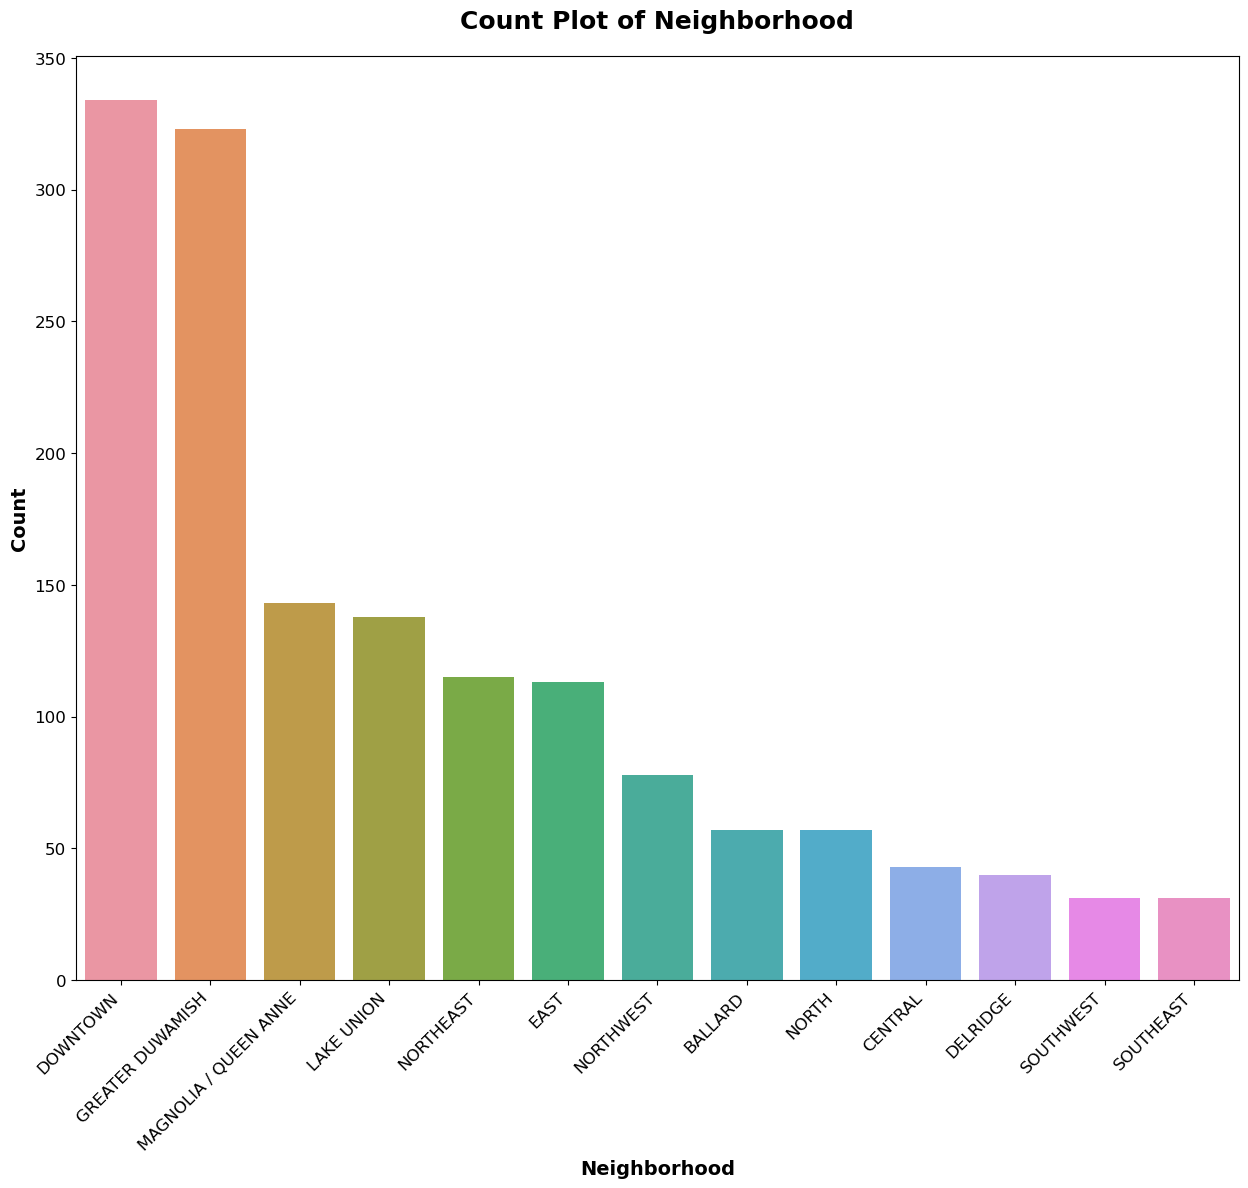

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


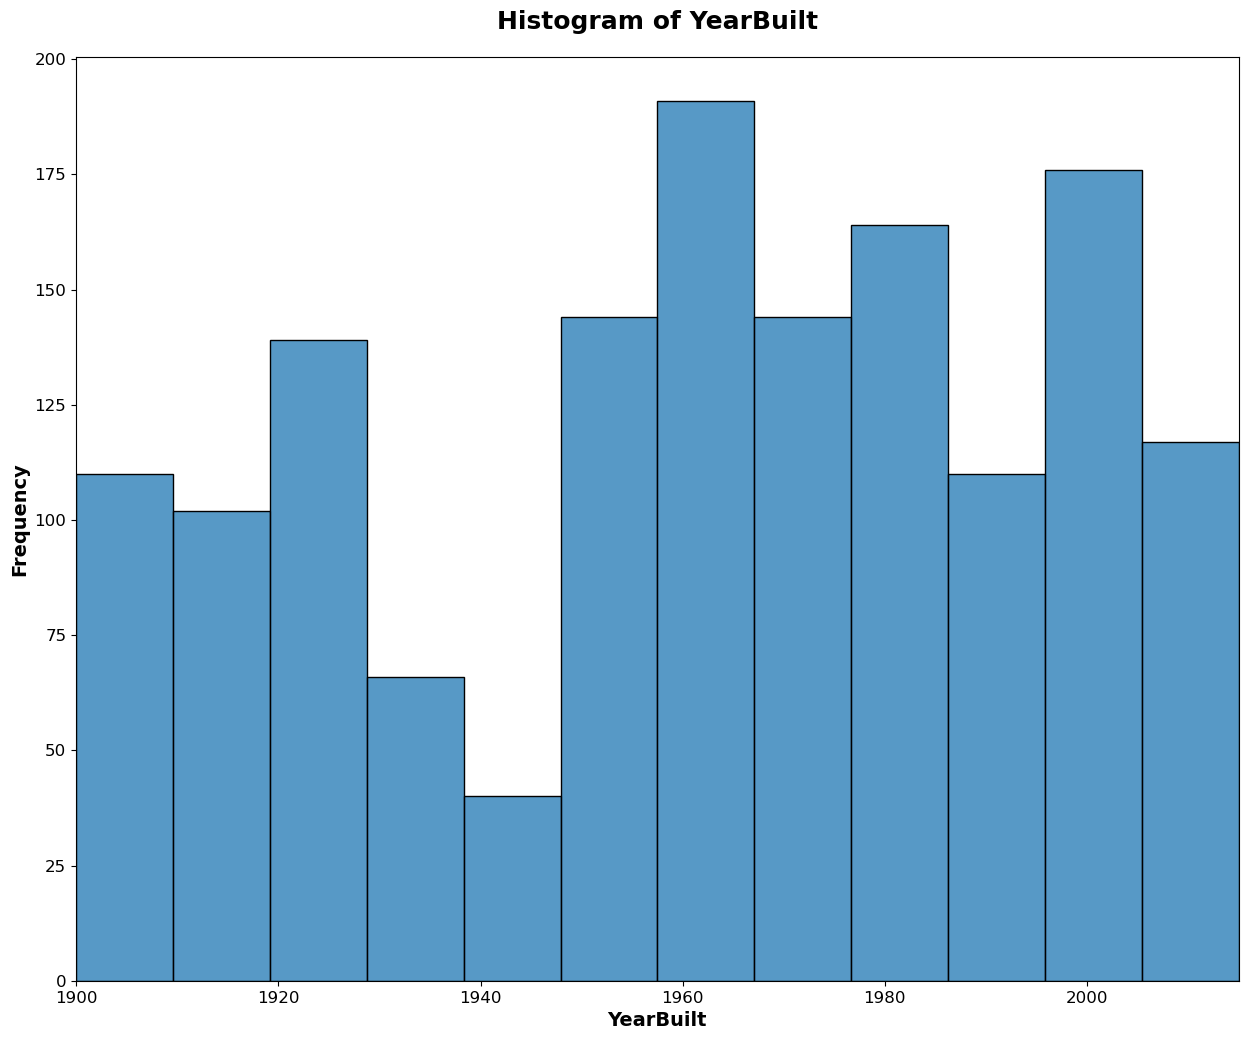

In [45]:
columns_to_check = ['BuildingType', 'LargestPropertyUseType', 'PrimaryPropertyType', 'NumberofFloors','Neighborhood', 'YearBuilt']

# Iterate over each column in df_data
for column in columns_to_check:
    # Check the data type of the column
    if df_data[column].dtype == 'object':
        # For categorical features, create a count plot
        plt.figure(figsize=(15, 12))
        sns.countplot(data=df_data, x=column, order=df_data[column].value_counts().index)
        plt.title(f'Count Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    else:
        # For numerical features, create a histogram
        plt.figure(figsize=(15, 12))
        sns.histplot(data=df_data, x=column, kde=False)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xlim(df_data[column].min(), df_data[column].max())  # Set x-axis limits based on data range

    # Show the plot
    plt.show()


D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


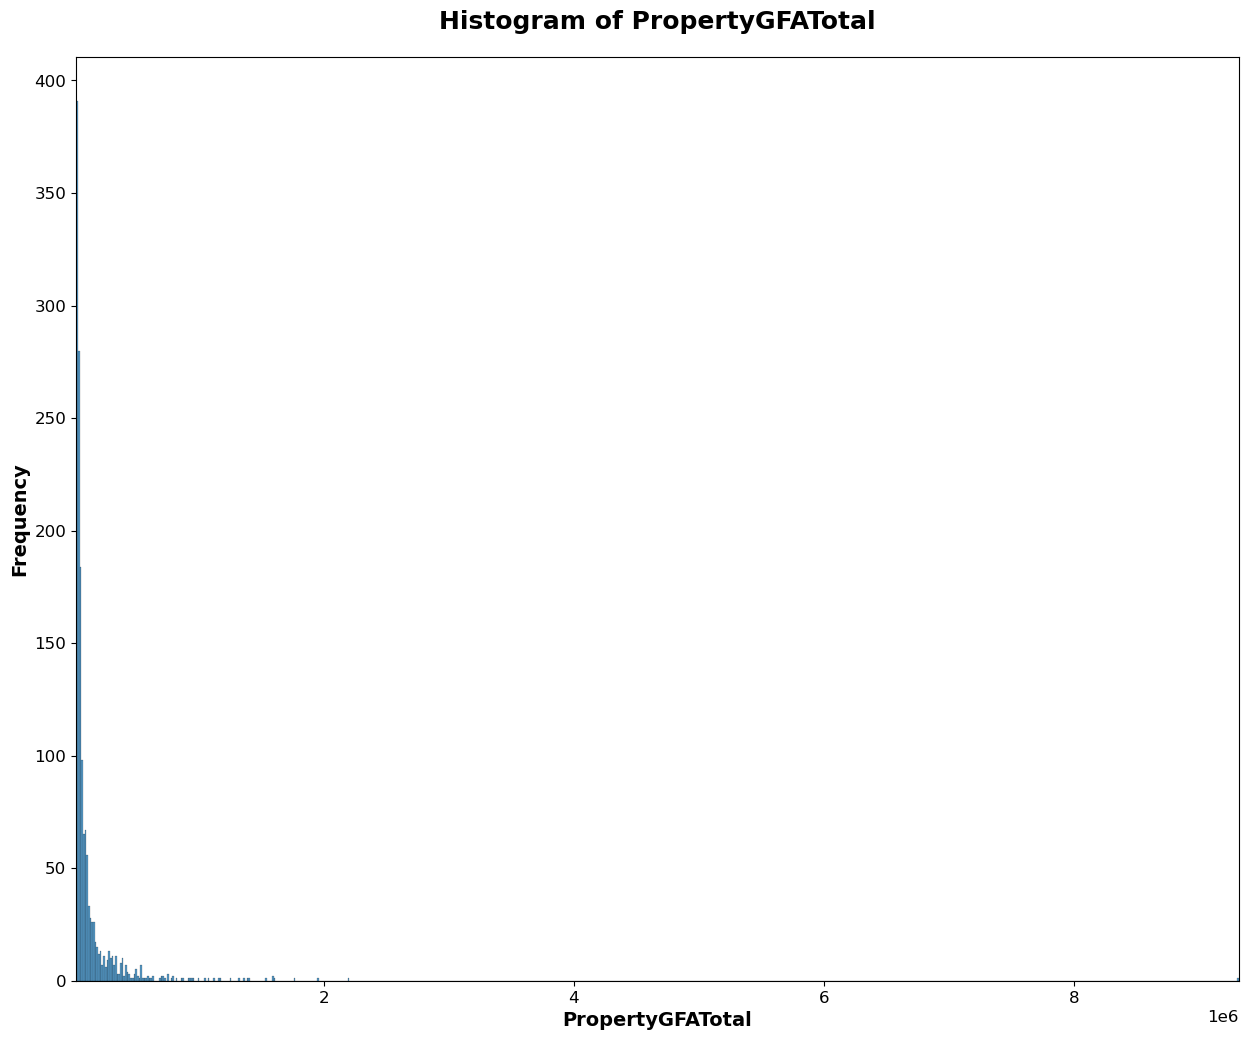

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


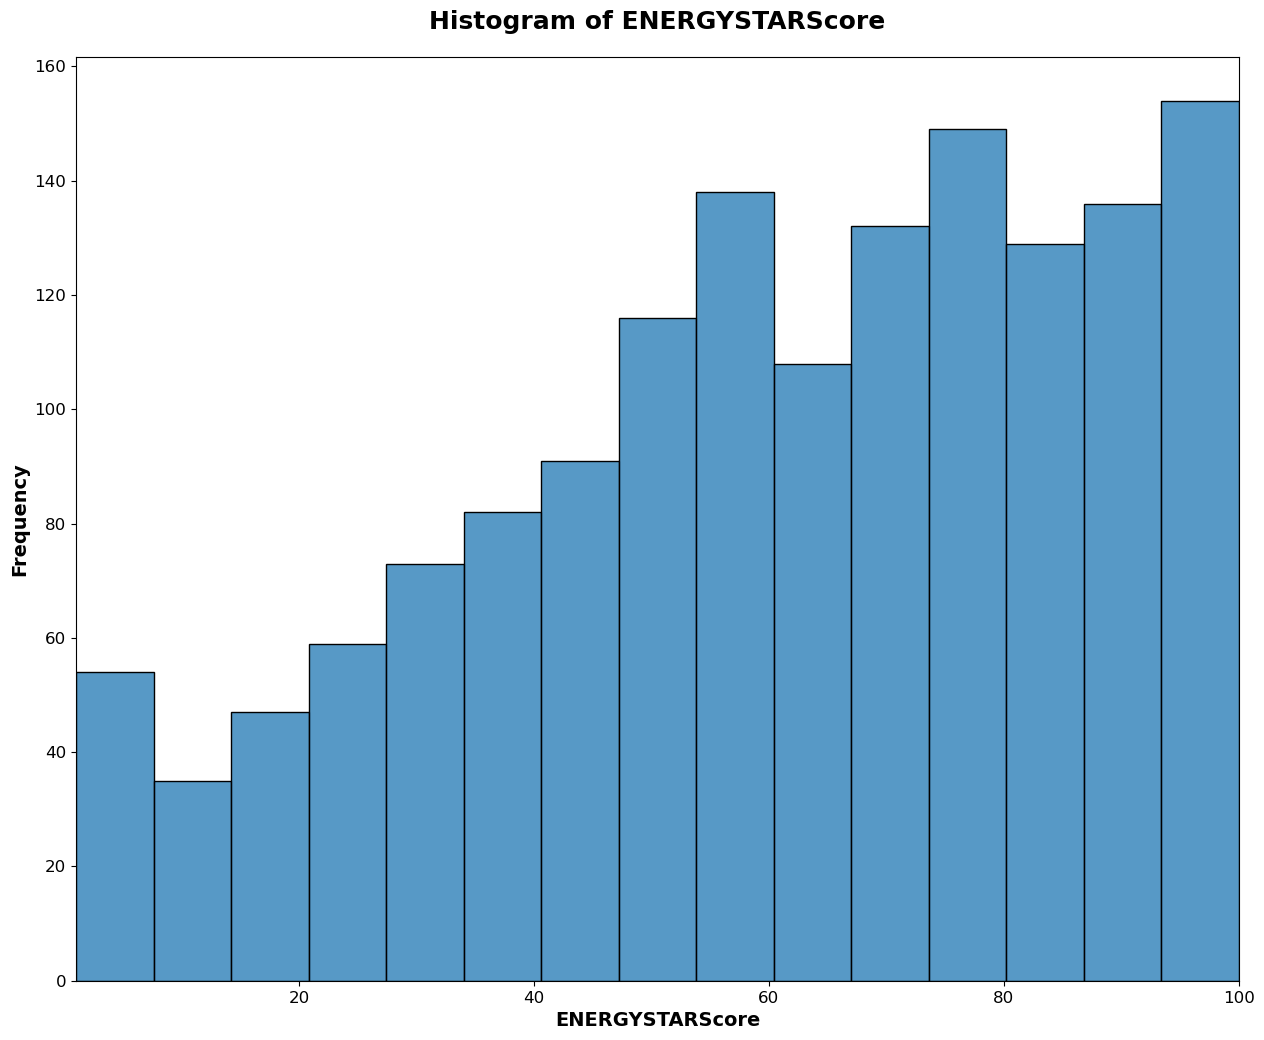

In [46]:
columns_to_check = ['PropertyGFATotal', 'ENERGYSTARScore']
# Iterate over each column in df_data
for column in columns_to_check:
    # Check the data type of the column
    if df_data[column].dtype == 'object':
        # For categorical features, create a count plot
        plt.figure(figsize=(15, 12))
        sns.countplot(data=df_data, x=column, order=df_data[column].value_counts().index)
        plt.title(f'Count Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    else:
        # For numerical features, create a histogram
        plt.figure(figsize=(15, 12))
        sns.histplot(data=df_data, x=column, kde=False)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xlim(df_data[column].min(), df_data[column].max())  # Set x-axis limits based on data range

    # Show the plot
    plt.show()


D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


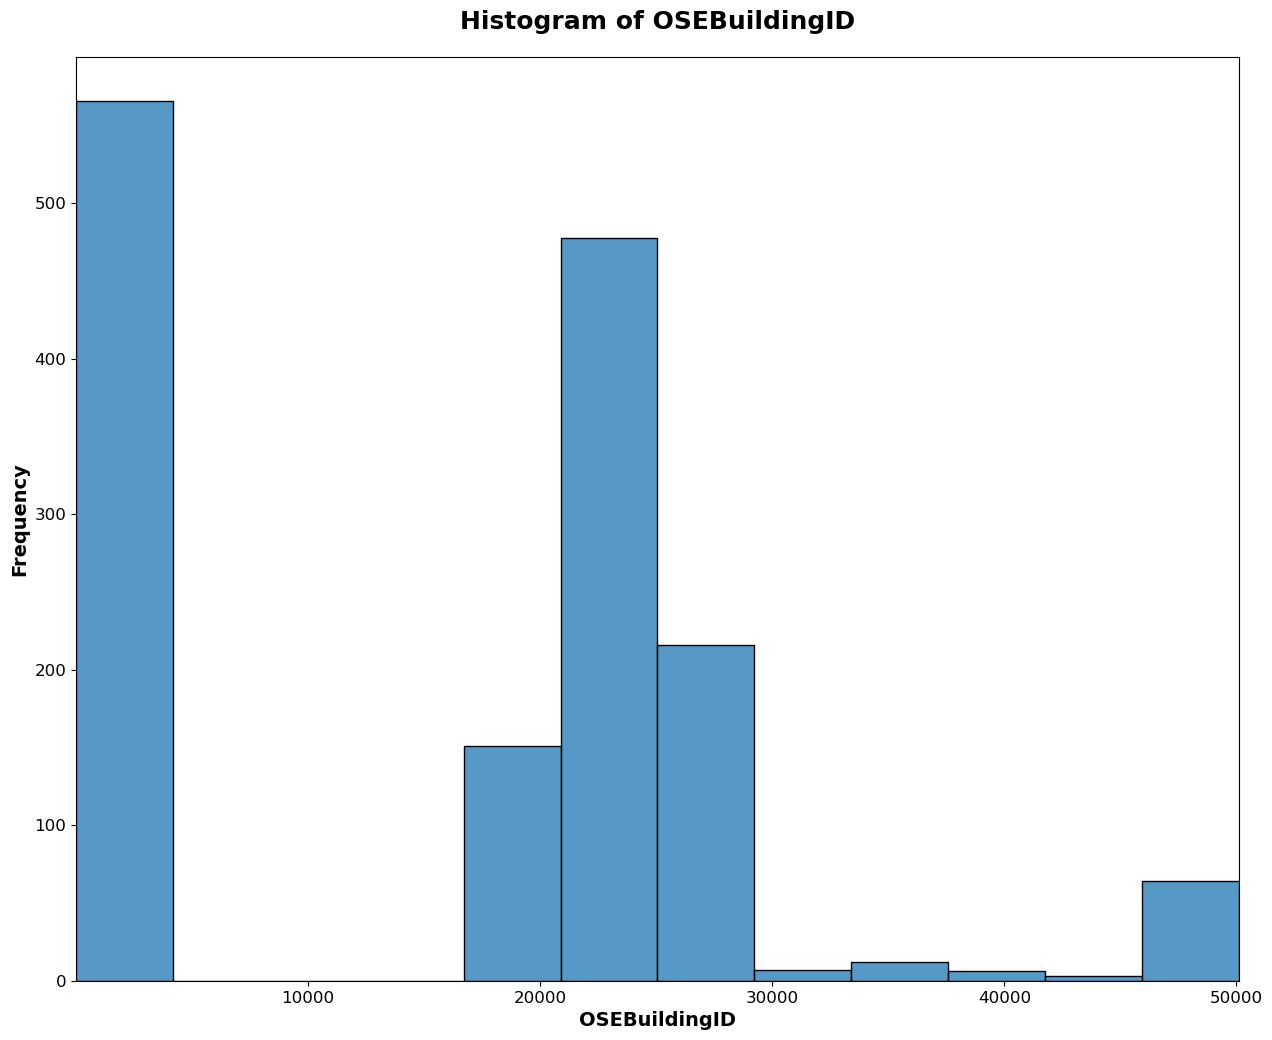

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


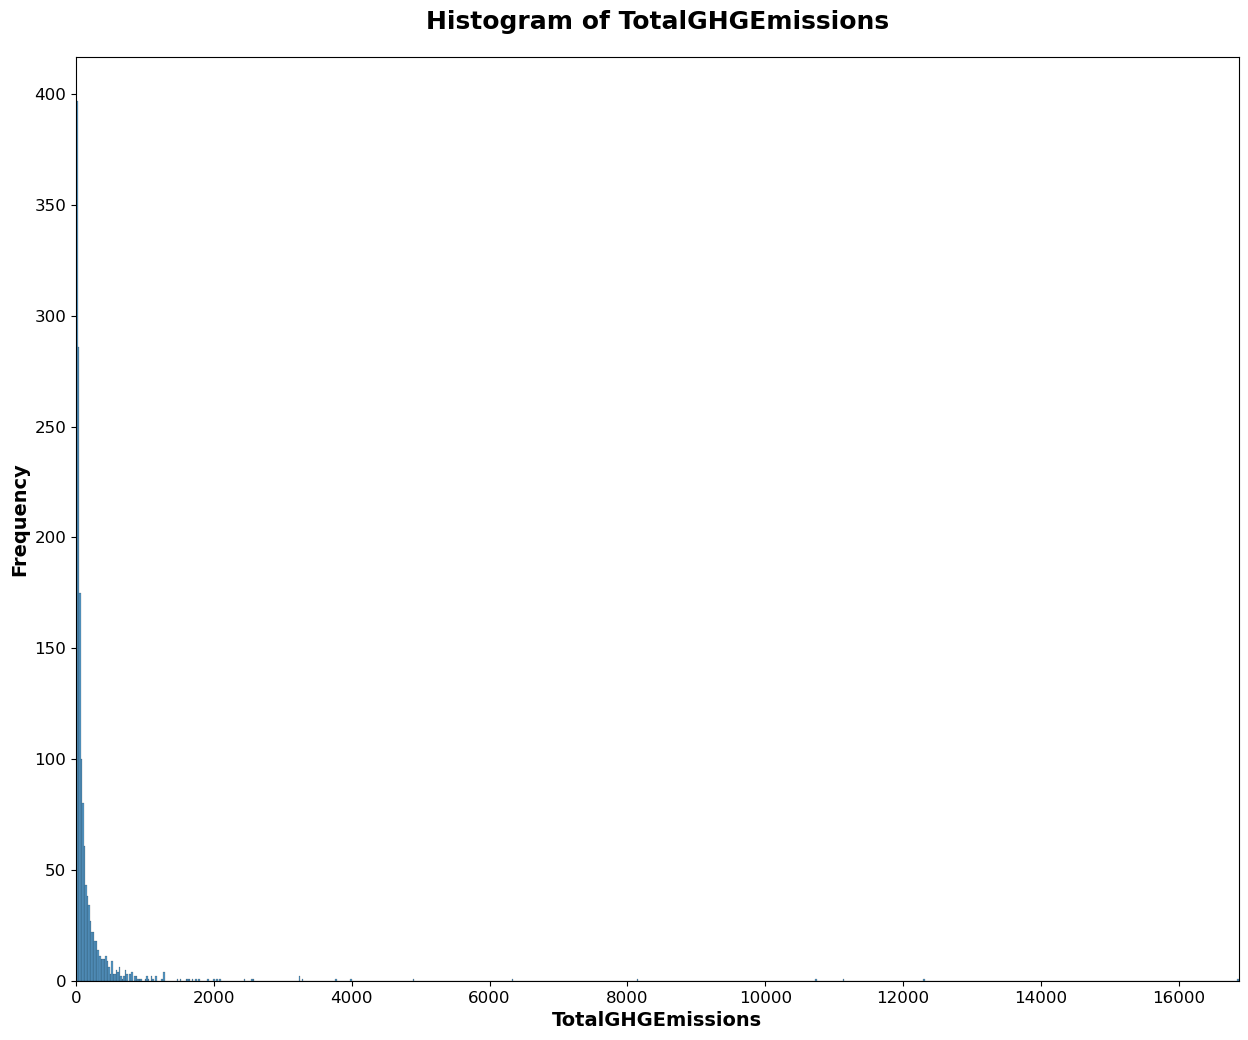

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


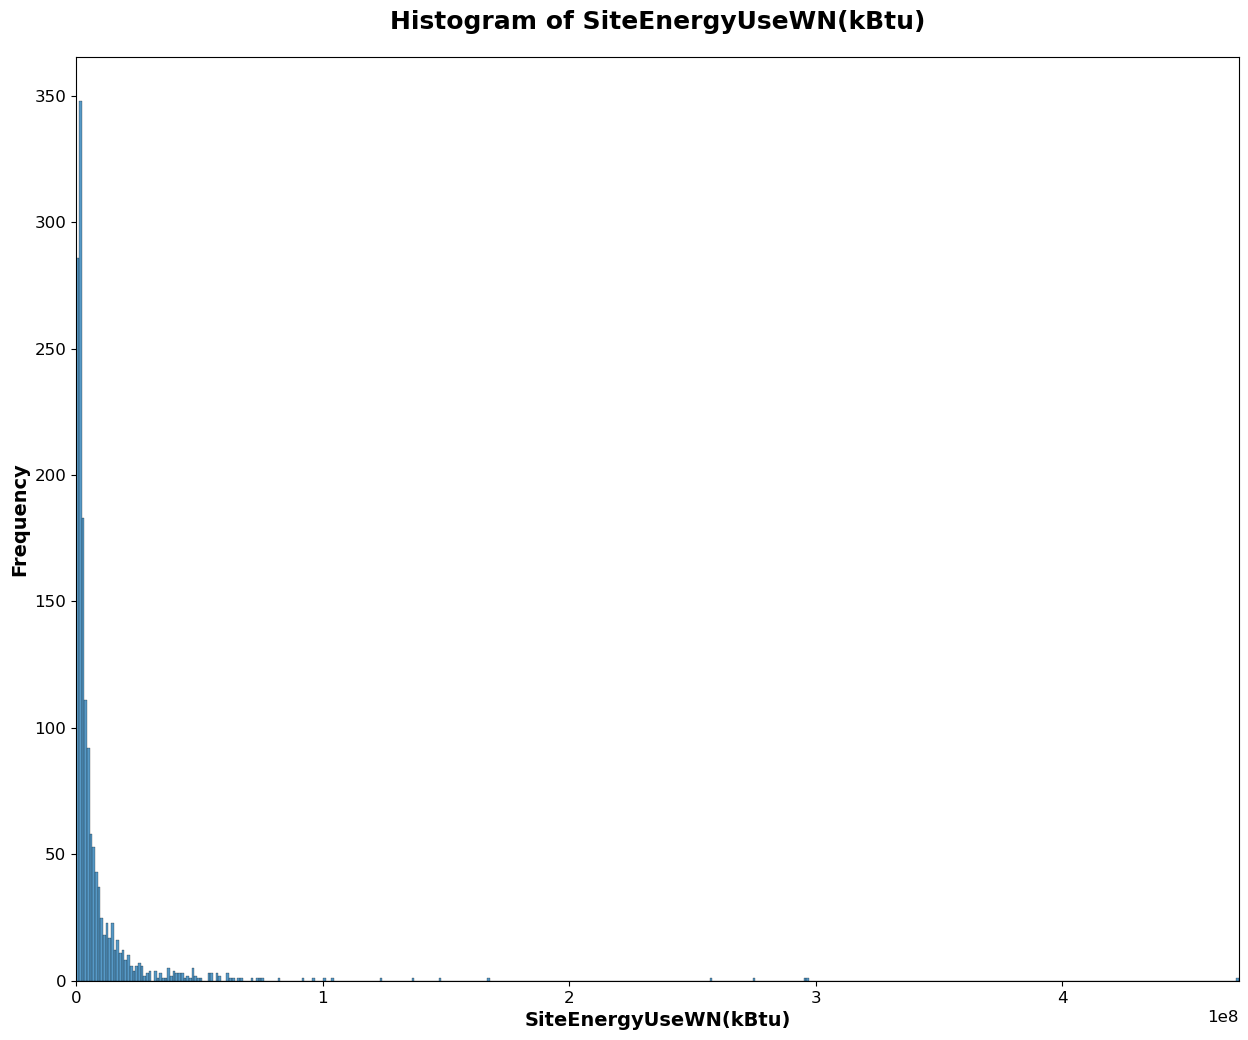

In [47]:
# Iterate over each column in df_data
for column in df_targets.columns:
    # Check the data type of the column
    if df_targets[column].dtype == 'object':
        # For categorical features, create a count plot
        plt.figure(figsize=(15, 12))
        sns.countplot(data=df_targets, x=column, order=df_targets[column].value_counts().index)
        plt.title(f'Count Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    else:
        # For numerical features, create a histogram
        plt.figure(figsize=(15, 12))
        sns.histplot(data=df_targets, x=column, kde=False)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xlim(df_targets[column].min(), df_targets[column].max())  # Set x-axis limits based on data range

    # Show the plot
    plt.show()


# X. Analyse bi/multi variée

## X.1. CORRELATION BETWEEN TARGET AND NUMERICAL FEATURES

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


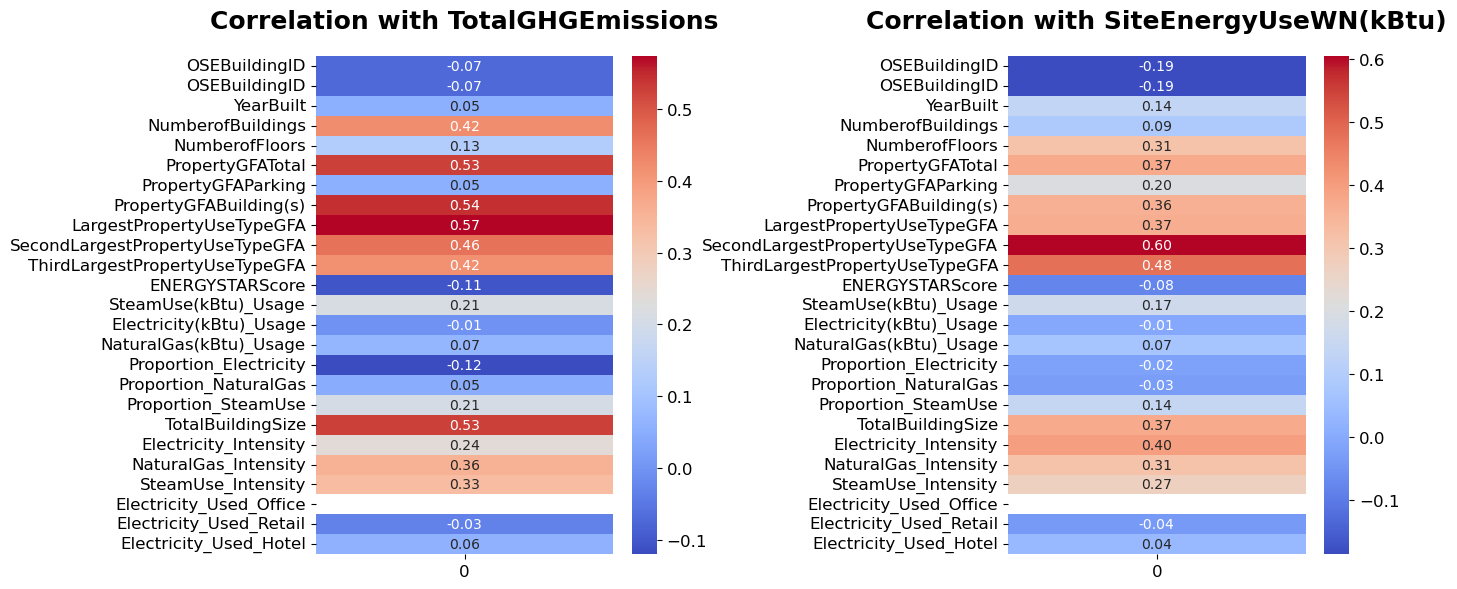

In [48]:
# Combine features and targets into one DataFrame
df_combined = pd.concat([df_data, df_targets], axis=1)

# Select only numerical features
numerical_features = df_data.select_dtypes(include=[np.number]).columns

# Calculate Pearson correlation coefficients for numerical features with the target variables
correlation_matrix = df_combined[numerical_features].corrwith(df_combined['TotalGHGEmissions'])
correlation_matrix_energy = df_combined[numerical_features].corrwith(df_combined['SiteEnergyUseWN(kBtu)'])

# Create subplots for TotalGHGEmissions and SiteEnergyUse(kBtu)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap for TotalGHGEmissions
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation with TotalGHGEmissions')

# Heatmap for SiteEnergyUse(kBtu)
sns.heatmap(correlation_matrix_energy.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation with SiteEnergyUseWN(kBtu)')

# Adjust layout
plt.tight_layout()
plt.show()


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop NaN values before calculating VIF
df_combined.dropna(inplace=True)

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_combined[numerical_features].values, i) for i in range(len(numerical_features))]

# Display the VIF DataFrame
print(vif_data[vif_data['VIF'] > 5])


                            feature      VIF
0                     OSEBuildingID      inf
1                         YearBuilt      inf
2                 NumberofBuildings  1080.39
3                    NumberofFloors     5.63
5                PropertyGFAParking      inf
6            PropertyGFABuilding(s)      inf
7         LargestPropertyUseTypeGFA      inf
8   SecondLargestPropertyUseTypeGFA    53.65
11             SteamUse(kBtu)_Usage     8.14
13           NaturalGas(kBtu)_Usage  1567.38
14           Proportion_Electricity     6.55
15            Proportion_NaturalGas  1460.46
16              Proportion_SteamUse   381.18
17                TotalBuildingSize    31.13
18            Electricity_Intensity      inf


D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


## X.1. Features Transformation due to high multicollinearity

### X.1.1. YearBuilt 
NOTE  : We can transform this column for having the age of a building instead of its year. 
NOTE 2: We succesfully transformed YearBuilt into BuildingAge. It does not appear in VIF >5 !!!


In [50]:
# Subtract YearBuilt from the current year to calculate building age
df_data['BuildingAge'] = 2024 - df_data['YearBuilt']

# # Age Categories of Buildings:
df_data['Old_Building'] = (df_data['YearBuilt'] < 1960).astype(int)
df_data['Mid_Age_Building'] = ((df_data['YearBuilt'] >= 1960) & (df_data['YearBuilt'] <= 1990)).astype(int)
df_data['New_Building'] = (df_data['YearBuilt'] > 1990).astype(int)

# Drop the original YearBuilt column 
df_data.drop('YearBuilt', axis=1, inplace=True)



### X.1.2. PropertyGFAParking and PropertyGFABuilding(s)
NOTE : Compute the ratio between parking area and building area to capture the proportion of parking space relative to the total building area.

In [51]:
df_data['ParkingToBuildingRatio'] = df_data['PropertyGFAParking'] / df_data['PropertyGFABuilding(s)']
df_data['PropertyGFAToTotalRatio'] = df_data['PropertyGFATotal'] / df_data['PropertyGFABuilding(s)']

df_data['LargestUseTypeToTotalRatio'] = df_data['LargestPropertyUseTypeGFA'] / df_data['PropertyGFATotal']


# Drop columns
df_data.drop('PropertyGFAParking', axis=1, inplace=True)
df_data.drop('PropertyGFABuilding(s)', axis=1, inplace=True)
df_data.drop('PropertyGFATotal', axis=1, inplace=True)



### X.1.3. PropertyGFATotal & LargestPropertyUseTypeGFA
NOTE : This ratio could capture the proportion of the largest property use type area relative to the total building area.


In [52]:
# # Property Use Size Ratios:
# df_data['LargestPropertyUseTypeGFA_to_TotalBuildingSize_Ratio'] = df_data['LargestPropertyUseTypeGFA'] / df_data['TotalBuildingSize']

# # Drop columns
# df_data.drop('PropertyGFATotal', axis=1, inplace=True)
# df_data.drop('LargestPropertyUseTypeGFA', axis=1, inplace=True)

### X.1.4. 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'

In [53]:
df_data['CombinedPropertyUseTypeGFA'] = df_data['LargestPropertyUseTypeGFA'] + df_data['SecondLargestPropertyUseTypeGFA'] + df_data['ThirdLargestPropertyUseTypeGFA']
df_data.drop(columns=['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'], inplace=True)


### X.1.5. 'NumberofFloors', 'NumberofBuildings'

In [54]:
df_data['Interaction_NumberofFloors_Buildings'] = df_data['NumberofFloors'] * df_data['NumberofBuildings']
df_data.drop(columns=['NumberofFloors', 'NumberofBuildings'], inplace=True)


# Calculate energy efficiency score
df_data['EnergyEfficiencyScore'] = df_data['ENERGYSTARScore'] * df_data['TotalBuildingSize'] / df_data['BuildingAge']





In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Combine features and targets into one DataFrame
df_combined = pd.concat([df_data, df_targets], axis=1)
# Drop NaN values before calculating VIF
df_combined.dropna(inplace=True)

# Select only numerical features
numerical_features = df_combined.select_dtypes(include=[np.number]).columns

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_combined[numerical_features].values, i) for i in range(len(numerical_features))]

# Display the VIF DataFrame
print(vif_data[vif_data['VIF'] > 5])


                                 feature     VIF
0                          OSEBuildingID     inf
1                        ENERGYSTARScore     inf
6                  Proportion_NaturalGas  214.92
7                    Proportion_SteamUse  220.82
8                      TotalBuildingSize   34.15
9                  Electricity_Intensity   60.92
16                          Old_Building    6.16
17                      Mid_Age_Building     inf
18                          New_Building     inf
19                ParkingToBuildingRatio     inf
20               PropertyGFAToTotalRatio     inf
21            LargestUseTypeToTotalRatio     inf
23  Interaction_NumberofFloors_Buildings   69.50
26                     TotalGHGEmissions     inf
27                 SiteEnergyUseWN(kBtu)     inf


D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [56]:
# Find indices of rows with NaN values in ENERGYSTARScore column for df_data
nan_indices = df_data[df_data['ENERGYSTARScore'].isna()].index

# Drop rows with NaN values in ENERGYSTARScore column for df_data
df_data = df_data.dropna(subset=['ENERGYSTARScore'])

# Remove corresponding rows in df_targets based on the indices of dropped rows in df_data
df_targets = df_targets.drop(nan_indices, errors='ignore')


In [57]:
df_data.shape

(1503, 33)

In [58]:
df_targets.shape

(1503, 3)

In [59]:
# # ==================================================================================================
# # PLOT MISSING VALUE RATIO BY FEATURES
# # ==================================================================================================
# # Calculate the total number of missing values for each feature
# missing_values = df_data.isnull().sum()

# # Calculate the total number of rows in the DataFrame
# total_rows = df_data.shape[0]

# # Calculate the missing value ratio for each feature
# missing_value_ratio = (missing_values / total_rows) * 100

# # Filter features with more than 20% missing values
# features_with_missing_values = missing_value_ratio[missing_value_ratio > 20].sort_values(ascending=False)

# # Plot the features with more than 20% missing values
# plt.figure(figsize=(10, 6))
# features_with_missing_values.plot(kind='bar')
# plt.title('Features with more than 20% missing values')
# plt.xlabel('Features')
# plt.ylabel('Missing Value Ratio (%)')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()




# # Filter features between 0% and 20% of missing values
# features_with_some_missing_values = missing_value_ratio[(missing_value_ratio > 0) & (missing_value_ratio <= 20)].sort_values(ascending=False)

# # Plot the features between 0% and 20% of missing values
# plt.figure(figsize=(10, 6))
# features_with_some_missing_values.plot(kind='bar')
# plt.title('Features with between 0% and 20% of missing values')
# plt.xlabel('Features')
# plt.ylabel('Missing Value Ratio (%)')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

# XI. SAVE DATA

In [60]:
# df_data.drop(columns=['ENERGYSTARScore'], inplace=True)

In [61]:
# Replace index of df_data with OSEBuildingID
df_data.set_index('OSEBuildingID', inplace=True)

# Replace index of df_targets with OSEBuildingID
df_targets.set_index('OSEBuildingID', inplace=True)

In [62]:
# ==================================================================================================
# SAVE DATA INTO EXCEL (df_data.xlsx & df_targets.xlsx)
# ==================================================================================================

# Specify the file path where you want to save the Excel file
excel_file_path = r'C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET4_Anticipez_les_besoins_en_consommation_de_batiments\DATA\df_data.xlsx'

# Write the DataFrame to Excel
df_data.to_excel(excel_file_path, index=False)

# Print a message indicating the successful save
print(f"Filtered data has been successfully saved to: {excel_file_path}")



# Specify the file path where you want to save the Excel file
excel_file_path = r'C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET4_Anticipez_les_besoins_en_consommation_de_batiments\DATA\df_targets.xlsx'

# Write the DataFrame to Excel
df_targets.to_excel(excel_file_path, index=False)

# Print a message indicating the successful save
print(f"Filtered data has been successfully saved to: {excel_file_path}")

Filtered data has been successfully saved to: C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET4_Anticipez_les_besoins_en_consommation_de_batiments\DATA\df_data.xlsx
Filtered data has been successfully saved to: C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET4_Anticipez_les_besoins_en_consommation_de_batiments\DATA\df_targets.xlsx
